# Deuxième partie du projet 4 : Anticipez les besoins en consommation de bâtiments

Bienvenue dans la deuxième partie du projet nommé "Anticipation des besoins en consommation des bâtiments."

Dans ce Jupyter Notebook, je vais vous présenter le travail réalisé pour prédire les émissions de CO₂ de chaque bâtiment non résidentiel présent dans notre jeu de données. Ce dernier a été préparé et exploré dans le premier notebook intitulé : "Projet 4 Notebook 1 : Analyse exploratoire".

Voici un rappel du contexte du projet :    

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

Tout d'abord, importons notre jeu de données et examinons ses principales caractéristiques. Cette étape nous permettra de comprendre sa structure, ainsi que la nature des informations qu'il contient.

## Première analyse

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Projet 4 : Anticiper les besoins en consommation pour les bâtiments/df_refined.csv')
display(df.head())
print(df.columns)
print(df.info())
df.describe()

,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,1.0,12,88434,0,Hotel,...,0.0,60.0,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,249.98,2.83,89
1,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,1.0,11,103566,15064,Hotel,...,4622.0,61.0,176.100006,8387933.0,0.00,3242851.0,5145082.0,295.86,2.86,20
2,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,1.0,41,956110,196718,Hotel,...,0.0,43.0,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,47
3,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,1.0,10,61320,0,Hotel,...,0.0,56.0,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,286.43,4.67,90
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,1.0,18,175580,62000,Hotel,...,0.0,75.0,211.399994,14172606.0,0.00,5368607.0,8803998.0,505.01,2.88,36


Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'ZipCode',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1544 non-null   object 
 1   PrimaryPropertyType              1544 non-null   object 
 2   PropertyName                     1544 non-null   object 

,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
count,1531.000000,1544.000000,1544.000000,1.544000e+03,1544.000000,1544.000000,1544.000000,995.000000,1544.000000,1.544000e+03,1.544000e+03,1.544000e+03,1.544000e+03,1544.000000,1544.000000,1544.000000
mean,98116.797518,1.178756,4.276554,1.214843e+05,13878.198187,19818.901099,3380.578626,63.625126,183.340285,8.874811e+06,5.526110e+05,6.150847e+06,2.041279e+06,193.947241,1.669385,54.310881
std,18.711837,3.043076,6.788486,3.066726e+05,43772.768606,52416.800715,18649.077742,28.833198,188.168020,3.134476e+07,5.725841e+06,2.153760e+07,9.722919e+06,780.080395,2.410282,32.856320
min,98006.000000,0.000000,0.000000,1.128500e+04,0.000000,0.000000,0.000000,1.000000,0.000000,5.713320e+04,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000,1.000000
25%,98104.000000,1.000000,1.000000,2.884325e+04,0.000000,0.000000,0.000000,44.000000,81.199997,1.251083e+06,0.000000e+00,7.308642e+05,0.000000e+00,20.595000,0.360000,27.000000
50%,98109.000000,1.000000,2.000000,4.812550e+04,0.000000,0.000000,0.000000,71.000000,138.650002,2.727768e+06,0.000000e+00,1.741474e+06,4.881350e+05,49.940000,0.880000,50.000000
75%,98125.000000,1.000000,4.000000,1.076615e+05,0.000000,13677.500000,0.000000,88.000000,213.549995,7.313082e+06,0.000000e+00,5.267052e+06,1.530812e+06,147.227500,1.965000,86.000000
max,98199.000000,111.000000,99.000000,9.320156e+06,512608.000000,639931.000000,459748.000000,100.000000,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000,116.000000


Dans ce notebook, nous allons examiner la variable TotalGHGEmissions comme cible pour nos prédictions.

Pour commencer, regardons encore une fois la distribution de chacune des variables de notre jeu de données à l’aide de boxplots. Cette visualisation nous permettra d’identifier les valeurs extrêmes au sein de notre jeu de données.



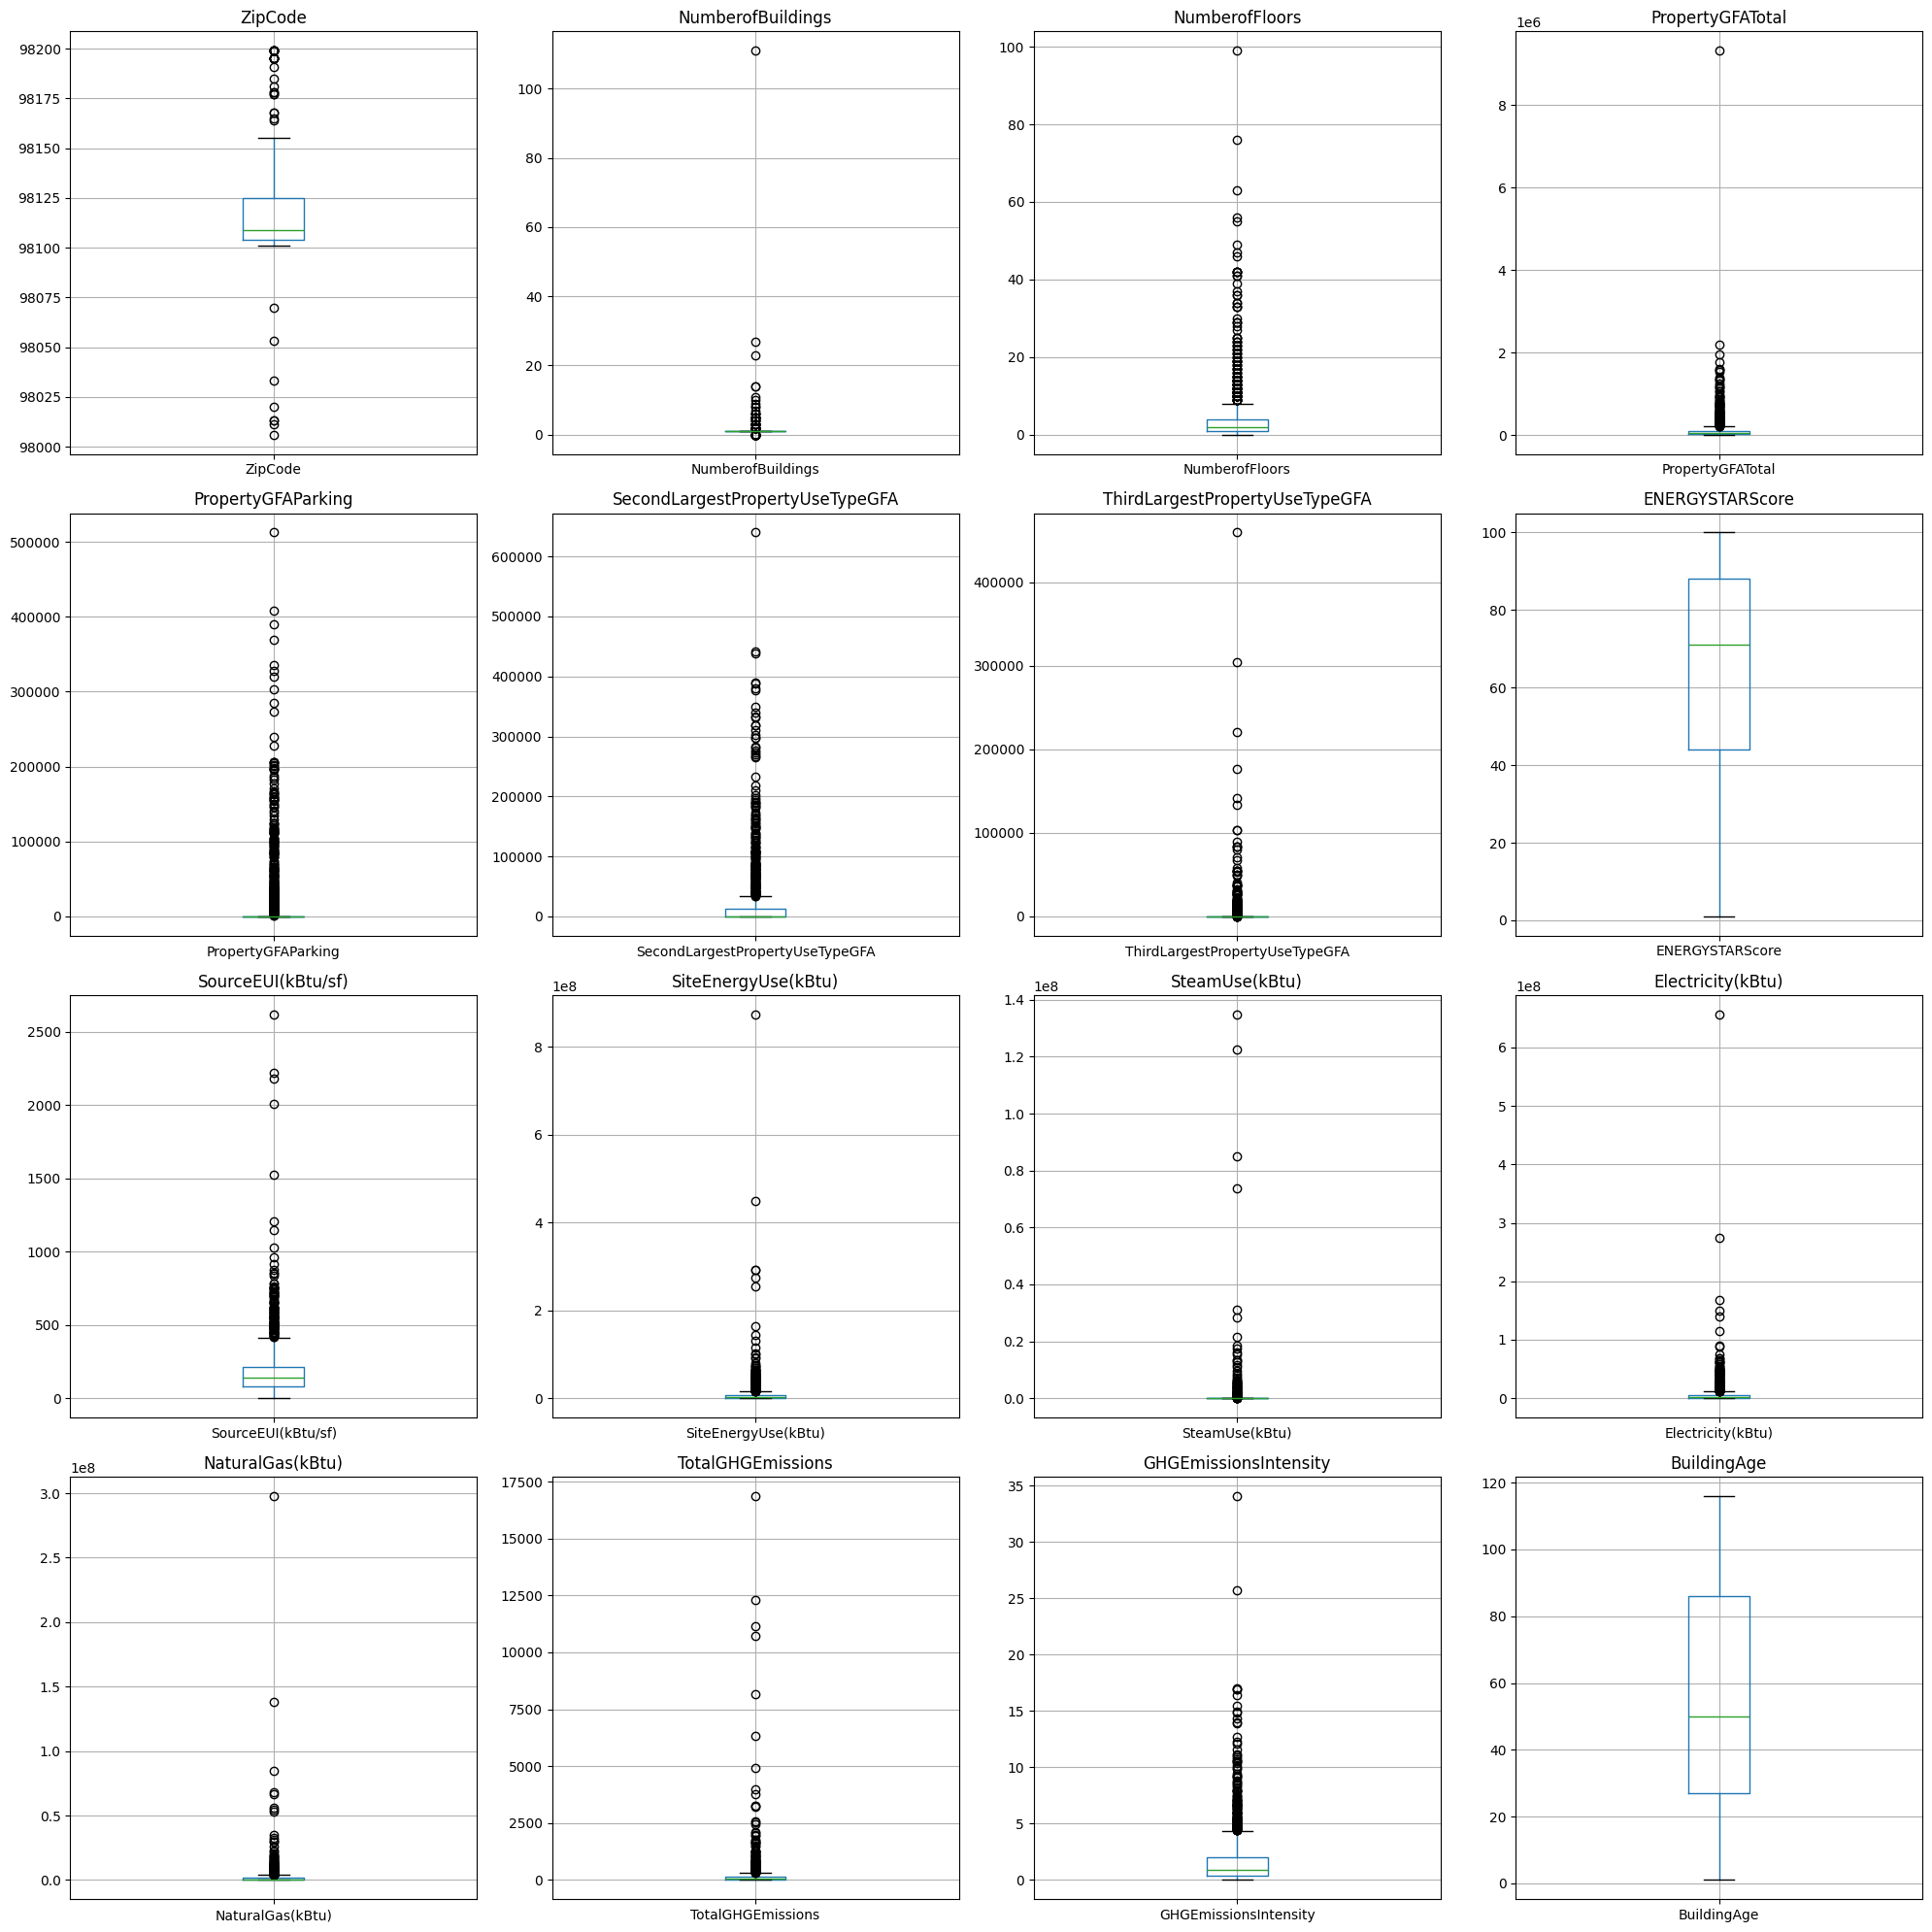

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sélectionne les colonnes numériques
numerical_cols = df.select_dtypes(include=np.number).columns

# Calcule le nombre de lignes pour les subplots
num_rows = int(np.ceil(len(numerical_cols) / 4))

# Crée les figures et les axes
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Parcourez les colonnes numériques et créez des boxplots
for i, col in enumerate(numerical_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Enlève les subplots vides si il y en a
if len(numerical_cols) % 4 != 0:
    for j in range(len(numerical_cols) % 4, 4):
        fig.delaxes(axes[num_rows - 1, j])

# Ajuster la mise en page et l'affichage
plt.tight_layout()
plt.show()

Regardons tout d'abord la composition des colonnes numériques ainsi que des colonnes catégoriques au sein du dataframe.



In [3]:
import numpy as np
objectColumns = list(df.select_dtypes(include=['object']).columns)
numericColumns = list(df.select_dtypes(exclude=['object']).columns)

print(objectColumns)
print(numericColumns)

['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
['ZipCode', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BuildingAge']


In [4]:
for column in objectColumns:
    print('{}: {} valeurs uniques'.format(column,len(df[column].unique())))

BuildingType: 5 valeurs uniques
PrimaryPropertyType: 21 valeurs uniques
PropertyName: 1540 valeurs uniques
Neighborhood: 14 valeurs uniques
LargestPropertyUseType: 55 valeurs uniques
SecondLargestPropertyUseType: 48 valeurs uniques
ThirdLargestPropertyUseType: 40 valeurs uniques


In [5]:
df=df.drop(['PropertyName','GHGEmissionsIntensity'],axis=1)
df['ZipCode']=df['ZipCode'].astype(str)
print(df.columns)

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'BuildingAge'],
      dtype='object')


On observe qu'il y a **1540** valeurs uniques au sein de la colonne "PropertyName", nous allons donc enlever cette colonne, n'allant pas servir pour notre algorithme de prédiction.

## Création d'un premier algorithme basique de prédiction de régression linéaire

Le but étant de se passer des relevés de consommation annuels futurs, nous allons supprimer de notre jeu de données les variables 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)' et 'NaturalGas(kBtu)'.

Pour ce notebook, nous allons également enlever la future seconde variable cible que nous compterons prédire au sein d'un troisième notebook, à savoir la consommation en énergie des bâtiments (SiteEnergyUse(kBtu)).



In [6]:
df_final=df.copy()
df_final=df_final.drop(['SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'],axis=1)
print(df_final.columns)
display(df_final.info())

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'BuildingAge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1544 non-null   object 
 1   PrimaryPropertyType              1544 non-null   object 
 2   ZipCode                          1544 non-null   object 
 3   Neighborhood                     1544 non-null   object 
 4   NumberofBuildings                1544 non-null   float64
 5  

None

In [ ]:
df_final.describe()

,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
count,1531.000000,1544.000000,1544.000000,1.544000e+03,1544.000000,1544.000000,1544.000000,995.000000,1.544000e+03,1544.000000,1544.000000,1544.000000
mean,98116.797518,1.178756,4.276554,1.214843e+05,13878.198187,19818.901099,3380.578626,63.625126,8.874811e+06,193.947241,1.669385,54.310881
std,18.711837,3.043076,6.788486,3.066726e+05,43772.768606,52416.800715,18649.077742,28.833198,3.134476e+07,780.080395,2.410282,32.856320
min,98006.000000,0.000000,0.000000,1.128500e+04,0.000000,0.000000,0.000000,1.000000,5.713320e+04,-0.800000,-0.020000,1.000000
25%,98104.000000,1.000000,1.000000,2.884325e+04,0.000000,0.000000,0.000000,44.000000,1.251083e+06,20.595000,0.360000,27.000000
50%,98109.000000,1.000000,2.000000,4.812550e+04,0.000000,0.000000,0.000000,71.000000,2.727768e+06,49.940000,0.880000,50.000000
75%,98125.000000,1.000000,4.000000,1.076615e+05,0.000000,13677.500000,0.000000,88.000000,7.313082e+06,147.227500,1.965000,86.000000
max,98199.000000,111.000000,99.000000,9.320156e+06,512608.000000,639931.000000,459748.000000,100.000000,8.739237e+08,16870.980000,34.090000,116.000000


Maintenant, regardons les lignes du dataframe dont les valeurs au sein de la colonne "GHGEmissions" sont supérieurs à 1000.

In [7]:
filtered_df = df[df["TotalGHGEmissions"] > 1000]
display(filtered_df)
print("Il y a",round(len(df_final[df_final["TotalGHGEmissions"] < 1000])/len(df_final)*100,2),"% de valeurs dont les émissions de C02 sont inférieurs à 1000.")


,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,SecondLargestPropertyUseType,...,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge
2,NonResidential,Hotel,98101.0,DOWNTOWN,1.0,41,956110,196718,Hotel,Non renseigné,...,Non renseigné,0.0,43.0,241.899994,72587024.0,21566554.0,49526664.0,1493800.0,2089.28,47
19,NonResidential,Other,98104.0,DOWNTOWN,1.0,10,540360,0,Courthouse,Non renseigné,...,Non renseigné,0.0,76.0,182.699997,44984468.0,0.0,24357833.0,20626631.0,1265.29,100
20,NonResidential,Other,98104.0,DOWNTOWN,1.0,19,385274,0,Other,Non renseigné,...,Non renseigné,0.0,NaN,229.500000,47859812.0,0.0,18257661.0,29602150.0,1699.45,31
30,Campus,Mixed Use Property,98108.0,GREATER DUWAMISH,1.0,3,494835,0,Office,Laboratory,...,Non-Refrigerated Warehouse,459748.0,8.0,388.200012,448385312.0,0.0,150476283.0,297909000.0,16870.98,24
43,NonResidential,Hotel,98101.0,DOWNTOWN,1.0,34,994212,146694,Hotel,Parking,...,Swimming Pool,0.0,63.0,182.500000,80469216.0,11598686.0,45545529.0,23324992.0,2451.58,34
53,NonResidential,Senior Care Community,98126.0,SOUTHWEST,1.0,5,217603,0,Senior Care Community,Parking,...,Non renseigné,0.0,54.0,235.000000,42792072.0,0.0,11824772.0,30967300.0,1727.11,94
84,NonResidential,Hospital,98107.0,BALLARD,4.0,5,285333,0,Hospital (General Medical & Surgical),Parking,...,Non renseigné,0.0,14.0,479.500000,68090728.0,0.0,35237205.0,32853512.0,1990.50,62
98,NonResidential,Other,98101.0,DOWNTOWN,1.0,11,299070,68432,Other,Non renseigné,...,Non renseigné,0.0,NaN,530.700012,65336980.0,0.0,30651644.0,34685331.0,2055.82,12
103,NonResidential,Hospital,98105.0,NORTHEAST,6.0,10,879000,0,Hospital (General Medical & Surgical),Non renseigné,...,Non renseigné,0.0,10.0,578.200012,253832464.0,0.0,115641210.0,138191238.0,8145.52,63
124,NonResidential,Other,98134.0,GREATER DUWAMISH,1.0,3,1172127,0,Other - Entertainment/Public Assembly,Non renseigné,...,Non renseigné,0.0,NaN,125.099998,58761304.0,0.0,40622381.0,18138920.0,1246.55,17


Il y a 97.34 % de valeurs dont les émissions de C02 sont inférieurs à 1000.


Il y a 41 lignes dont les émissions totales de CO2 sont supérieurs à 1000, ce qui représente un peu moins de 3% de notre jeu de données. Nous n'allons donc que garder les lignes du dataframe dont les valeurs au sein de la colonne "TotalGHGEmissions" sont inférieurs à 1000, afin d'avoir un algorithme de prédiction plus performant.

In [8]:
#Création du dataframe filtré
df_partial = df_final.copy()
df_partial = df_partial[df_partial["TotalGHGEmissions"] < 1000]
df_partial.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1503.000000,1503.000000,1.503000e+03,1503.000000,1503.000000,1503.000000,973.000000,1.503000e+03,1503.000000,1503.000000
mean,1.081836,4.141717,1.045939e+05,13520.916168,17419.058747,2901.225149,64.004111,6.040374e+06,110.960153,54.585496
std,1.108896,6.657636,1.748851e+05,43414.567856,44359.531705,14179.909515,28.766586,9.328695e+06,153.519124,32.828457
min,0.000000,0.000000,1.128500e+04,0.000000,0.000000,0.000000,1.000000,5.713320e+04,-0.800000,1.000000
25%,1.000000,1.000000,2.872800e+04,0.000000,0.000000,0.000000,44.000000,1.226150e+06,19.910000,28.000000
50%,1.000000,2.000000,4.658000e+04,0.000000,0.000000,0.000000,71.000000,2.595784e+06,48.540000,51.000000
75%,1.000000,4.000000,9.960250e+04,0.000000,13194.000000,0.000000,89.000000,6.751441e+06,131.210000,86.000000
max,27.000000,99.000000,1.952220e+06,512608.000000,389860.000000,303910.000000,100.000000,9.293764e+07,940.470000,116.000000


Observons maintenant les nouvelles distributions des valeurs au sein de notre dataframe filtré.

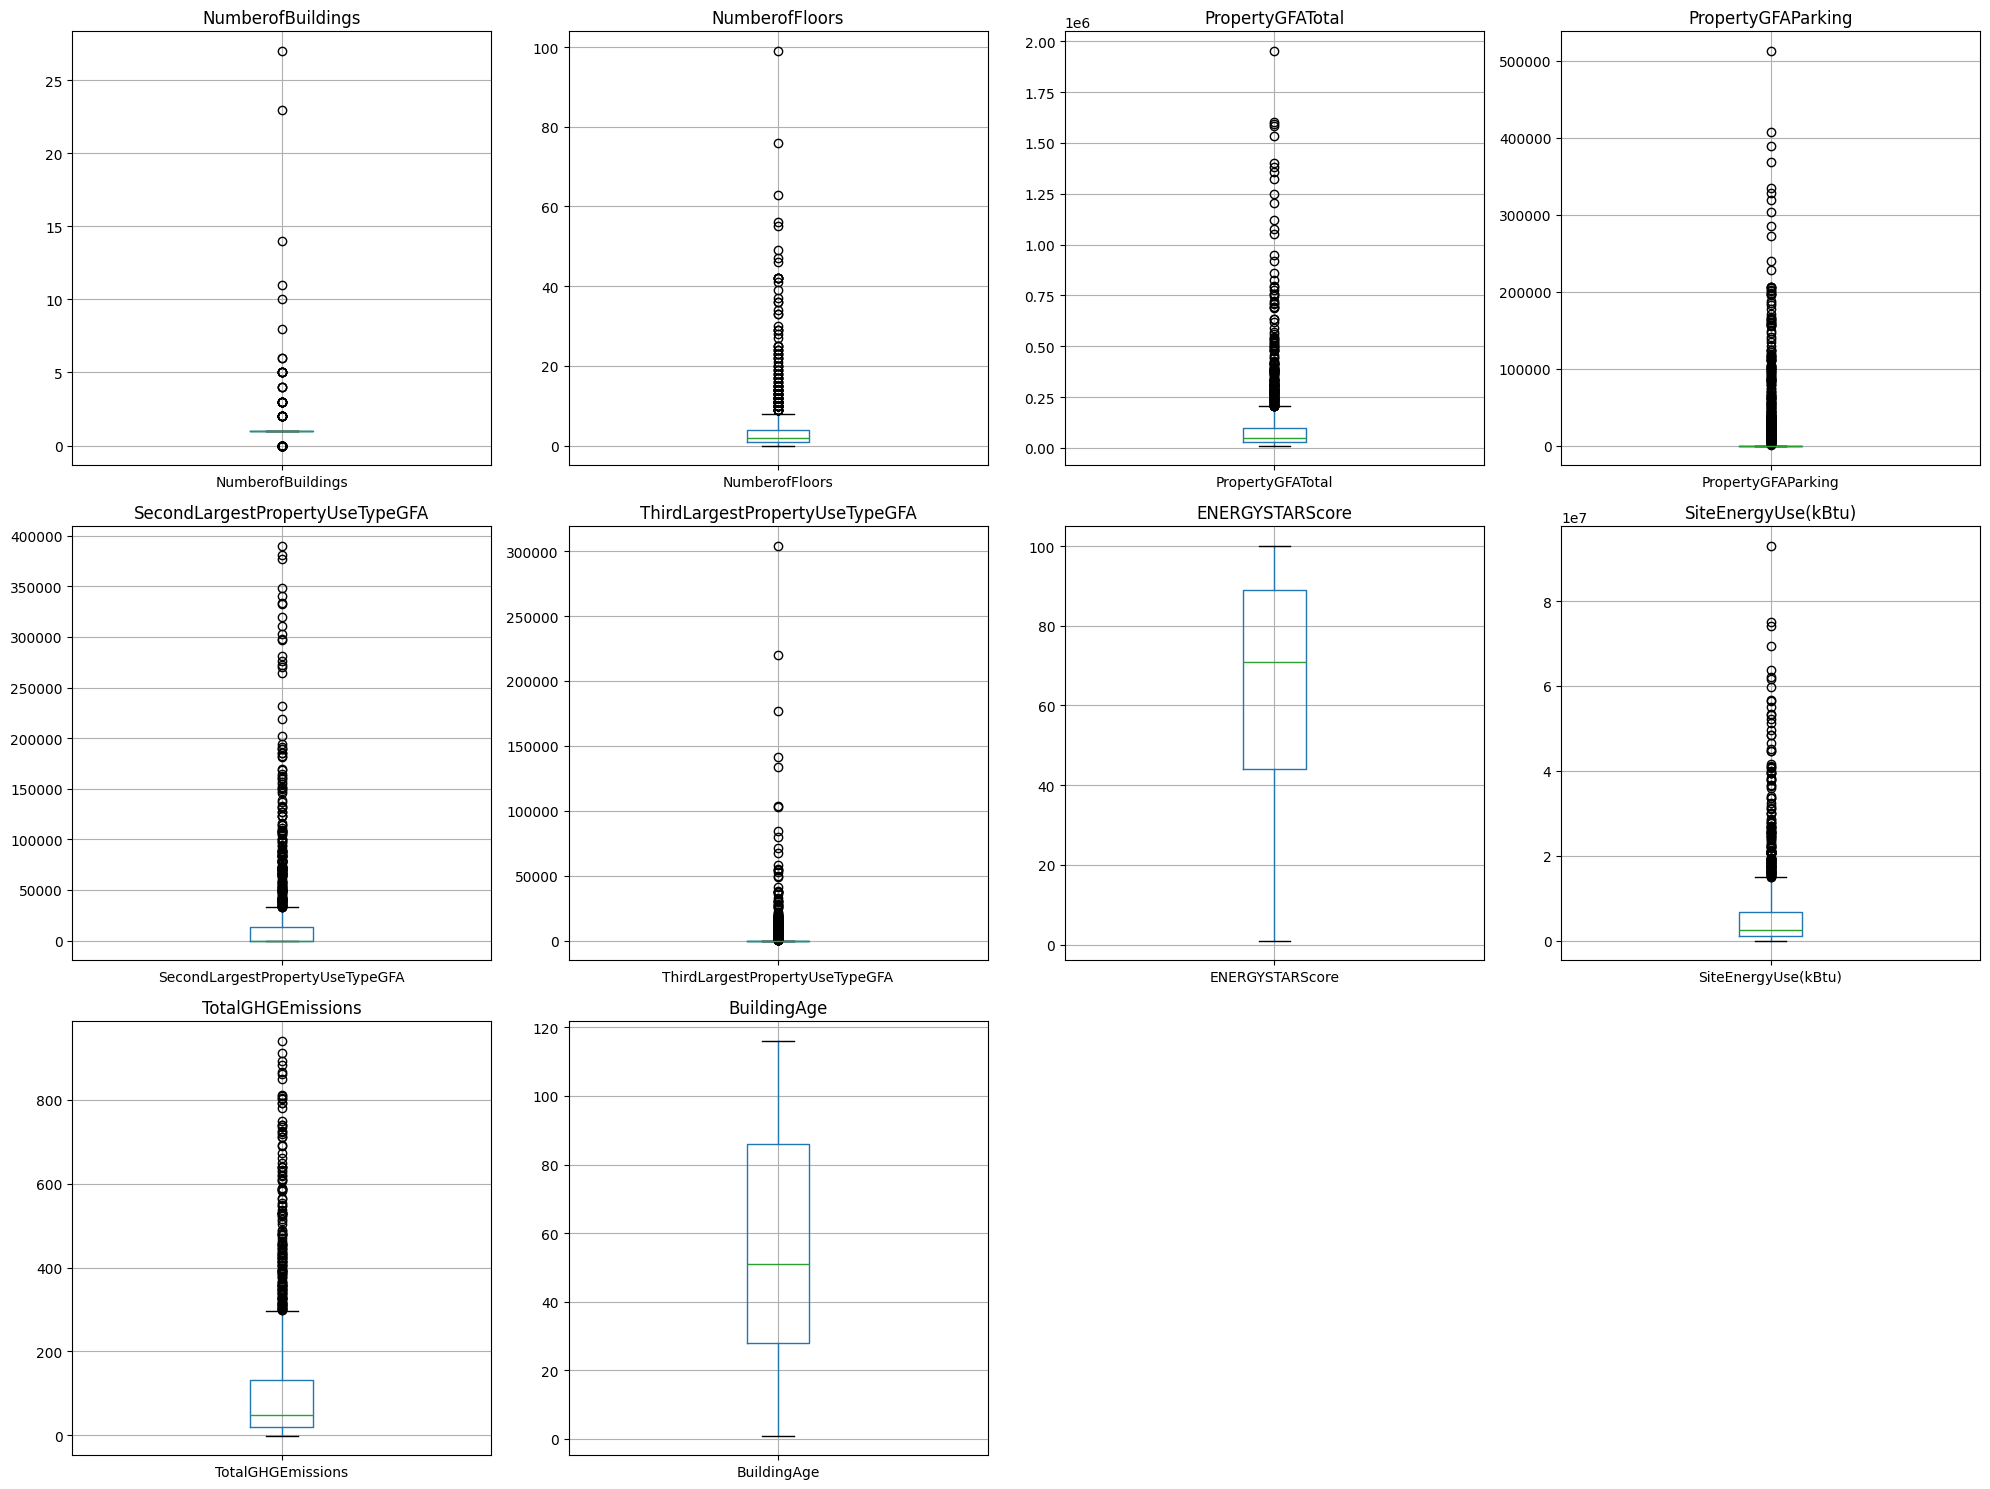

In [9]:
# Sélectionne les colonnes numériques
numerical_cols = df_partial.select_dtypes(include=np.number).columns

# Calcule le nombre de lignes pour les subplots
num_rows = int(np.ceil(len(numerical_cols) / 4))

# Crée les figures et les axes
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

# Parcourez les colonnes numériques et créez des boxplots
for i, col in enumerate(numerical_cols):
    row = i // 4
    col_num = i % 4
    ax = axes[row, col_num]
    df_partial.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Enlève les subplots vides si il y en a
if len(numerical_cols) % 4 != 0:
    for j in range(len(numerical_cols) % 4, 4):
        fig.delaxes(axes[num_rows - 1, j])

# Ajuster la mise en page et l'affichage
plt.tight_layout()
plt.show()

La majorité des valeurs aberrantes qui risquent de fausser notre algorithme ont bien été enlevées grâce à notre filtrage précédent.

N'ayant pas fait d'analyse poussée sur les outliers je vais utiliser le RobustScaler (les statistiques de centrage et de mise à l'échelle de RobustScaler sont basées sur des centiles et ne sont donc pas influencées par un petit nombre de valeurs aberrantes marginales très importantes) pour les valeurs numériques et le OneHotEncoder ou le OrdinalEncoder pour les valeurs catégorielles.

In [10]:
import numpy as np
objectColumns = list(df.select_dtypes(include=['object']).columns)
numericColumns = list(df.select_dtypes(exclude=['object']).columns)

print(objectColumns)
print(numericColumns)

['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'BuildingAge']


In [ ]:
df_partial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1543
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1503 non-null   object 
 1   PrimaryPropertyType              1503 non-null   object 
 2   ZipCode                          1490 non-null   float64
 3   Neighborhood                     1503 non-null   object 
 4   NumberofBuildings                1503 non-null   float64
 5   NumberofFloors                   1503 non-null   int64  
 6   PropertyGFATotal                 1503 non-null   int64  
 7   PropertyGFAParking               1503 non-null   int64  
 8   LargestPropertyUseType           1503 non-null   object 
 9   SecondLargestPropertyUseType     1503 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  1503 non-null   float64
 11  ThirdLargestPropertyUseType      1503 non-null   object 
 12  ThirdLargestPropertyUseTy

Rappelons la liste des colonnes dont le type est catégoriel, ainsi que leurs nombres de valeurs uniques, afin de savoir par la suite quelles variables nous allons encoder avec le OneHotEncoder, et lesquelles nous allons encoder avec le OrdinalEncoder.

In [11]:
categorical_cols = df_partial.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
for col in df_partial.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_partial[col].nunique()}")

['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
BuildingType: 5
PrimaryPropertyType: 21
ZipCode: 48
Neighborhood: 14
LargestPropertyUseType: 54
SecondLargestPropertyUseType: 47
ThirdLargestPropertyUseType: 39


Enfin, nous devons tout d'abord réaliser la prédiction sans la variable "ENERGYSTARScore", nous allons donc dans un premier temps la retirer de notre dataframe.

In [17]:
df_cleaned = df_partial[df_partial['ZipCode'].notna()]
df_cleaned = df_cleaned.drop('ENERGYSTARScore', axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1543
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1503 non-null   object 
 1   PrimaryPropertyType              1503 non-null   object 
 2   ZipCode                          1503 non-null   object 
 3   Neighborhood                     1503 non-null   object 
 4   NumberofBuildings                1503 non-null   float64
 5   NumberofFloors                   1503 non-null   int64  
 6   PropertyGFATotal                 1503 non-null   int64  
 7   PropertyGFAParking               1503 non-null   int64  
 8   LargestPropertyUseType           1503 non-null   object 
 9   SecondLargestPropertyUseType     1503 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  1503 non-null   float64
 11  ThirdLargestPropertyUseType      1503 non-null   object 
 12  ThirdLargestPropertyUseTy

Maintenant, séparons les variables catégoriques en deux sous-catégories pour notre algorithme : les colonnes ordinales ainsi que les colonnes OneHot. Le classement de ces deux catégories s'est fait en fonction du nombre de valeurs uniques présentes au sein de chacunes de ces colonnes.

Nous allons ensuite créer deux ensembles de variables pour la prédiction : les variables d'entrainement ainsi que la variable cible, ici TotalGHGEmissions.

In [18]:
Ordinal_Cols = ['PrimaryPropertyType','Neighborhood','LargestPropertyUseType','ZipCode','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
OneHot_Cols = ['BuildingType']
# y_site = df_cleaned["SiteEnergyUse(kBtu)"]
y_ghg = df_cleaned["TotalGHGEmissions"]
X = df_cleaned.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)
numerical_cols = X.select_dtypes(include=['number']).columns

In [14]:
#Import des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [15]:
# Création de la fonction RobustScaler
y_scaler_ghg = RobustScaler()

# Transformation de la variable cible à l'aide du RobustScaler
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Définit les transformers pour le pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Créer le pipeline pour le préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)


In [93]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet

# Définit le modèle de régression linéaire
linear_reg = LinearRegression()


# Créer le pipeline avec la régression linéaire
pipeline_lr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_reg)])

pipeline_lr_ghg.fit(X_train, y_ghg_train)

y_pred_scaled = pipeline_lr_ghg.predict(X_test)
y_pred = y_scaler_ghg.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = y_scaler_ghg.inverse_transform(y_ghg_test.reshape(-1, 1)).ravel()

# Calcule les métriques
mse = mean_squared_error(y_test_original, y_pred)
rmse = root_mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Imprime les résultats
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R² Score (Accuracy):",r2)

Mean Squared Error (MSE): 15380.2346557234
Root Mean Squared Error (RMSE): 124.01707404919453
R² Score (Accuracy): 0.29163084140671314


In [97]:
# 2. Calculate errors (residuals)
errors = y_ghg_test - y_pred

# 3. Create a DataFrame with errors and features
errors_df = pd.DataFrame({'Error': errors})
errors_df = pd.concat([errors_df, X_test], axis=1)

In [98]:
errors_df.head()

,Error,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,BuildingAge
0,-76.567678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-149.982569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-61.988998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-145.813292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-63.856112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse des scores

R² :

Les scores de RandomForest, ExtraTrees et GradientBoosting montrent que ces modèles expliquent une part importante de la variance, avec ExtraTrees en tête.
Les scores faibles de ElasticNet et SVM indiquent que ces modèles sont moins adaptés aux données.

MSE/RMSE :

Les erreurs sont relativement élevées pour tous les modèles. Un RMSE supérieur à 100 peut être problématique si les valeurs cibles réelles (GHG, par exemple) sont proches de cette échelle.
Cela pourrait indiquer des problèmes comme :
Overfitting (surtout avec RandomForest et GradientBoosting).
Sous-ajustement pour ElasticNet et SVM.

L'algorithme de la régression linéaire n'a pas l'air de bien marcher pour ce modèle, nous allons donc essayer des algorithmes plus complexes qui pourraient obtenir de meilleurs scores de prédictions.

## Visualisation des erreurs en fonction des variables du modèle

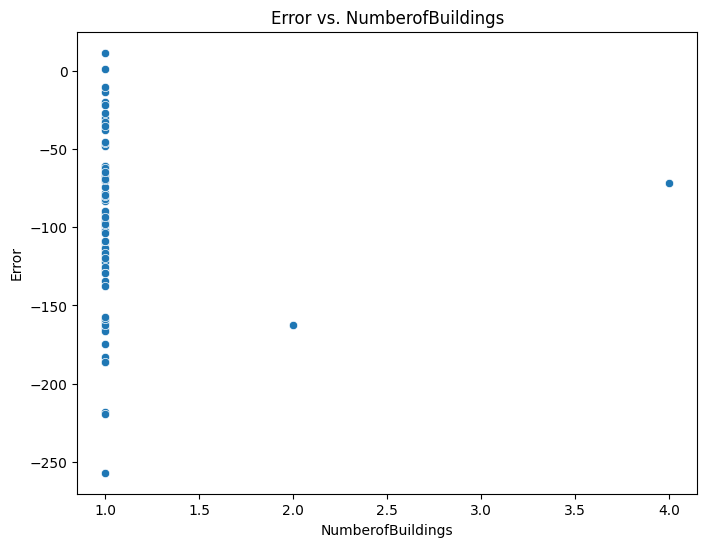

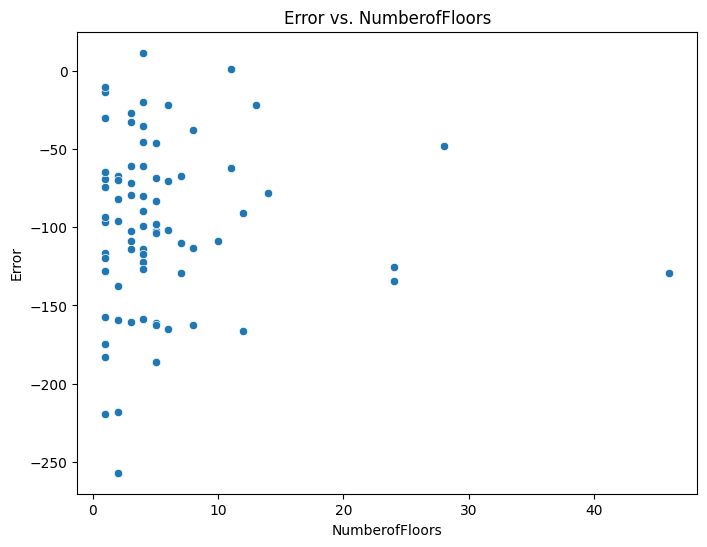

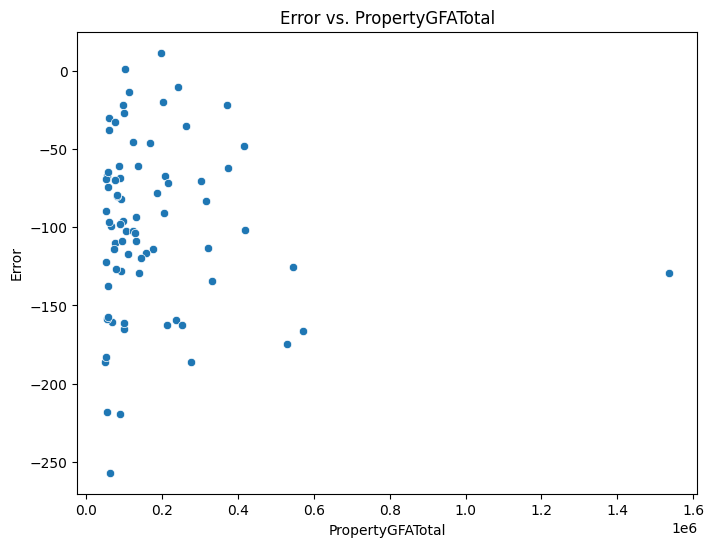

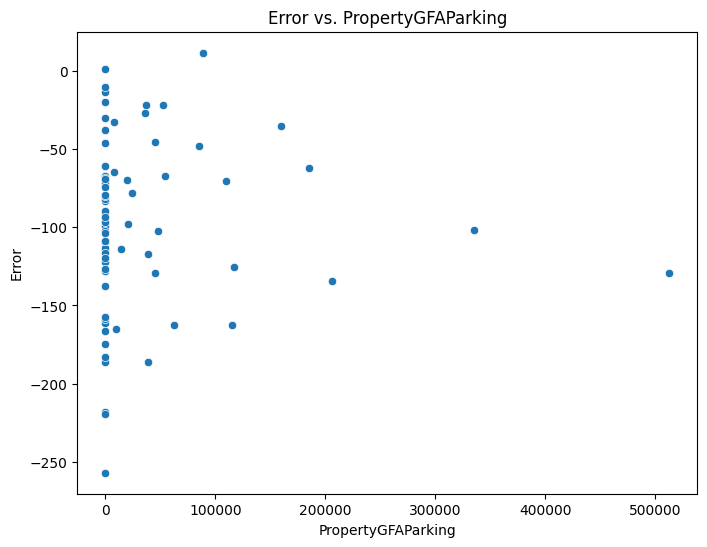

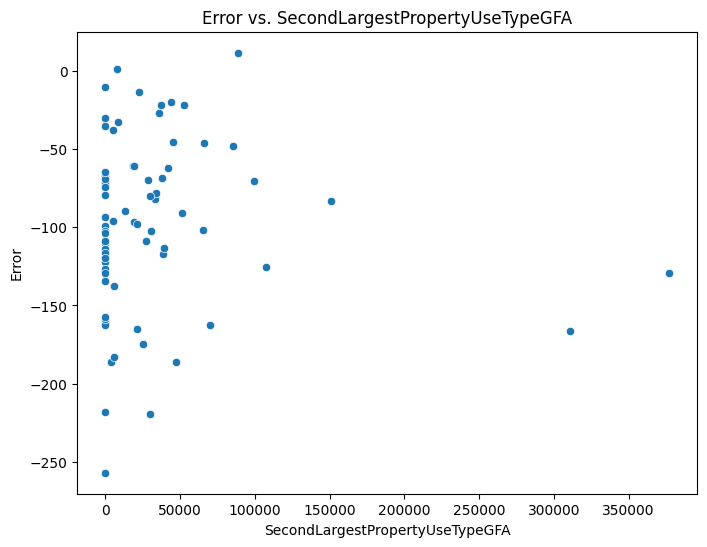

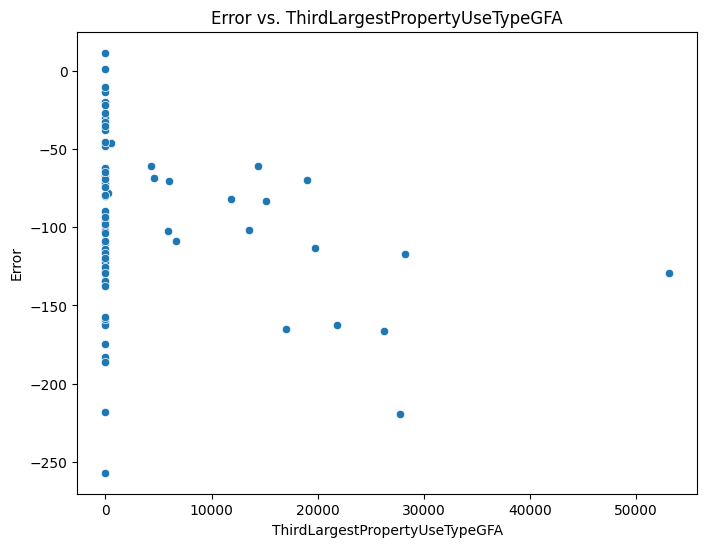

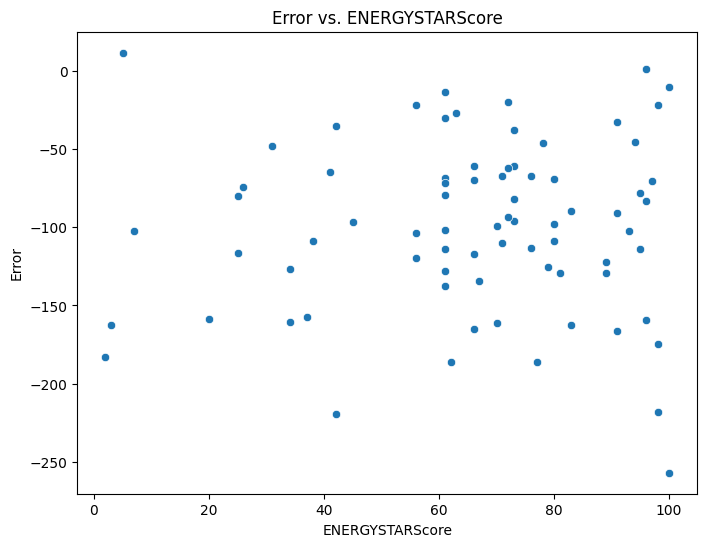

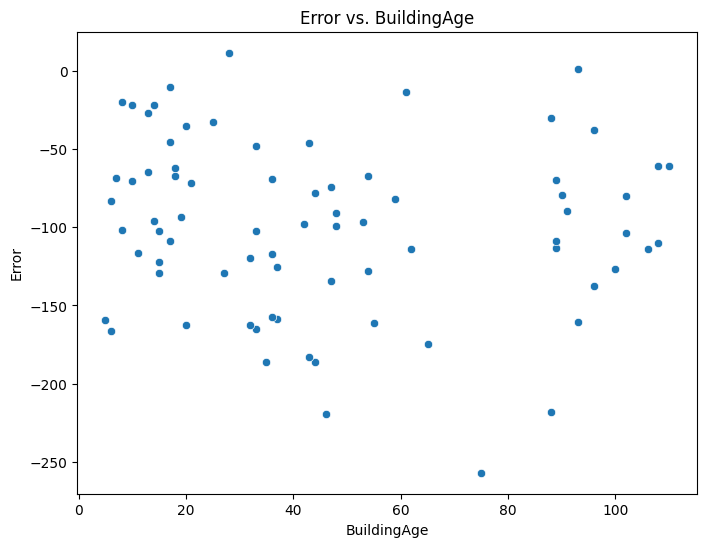

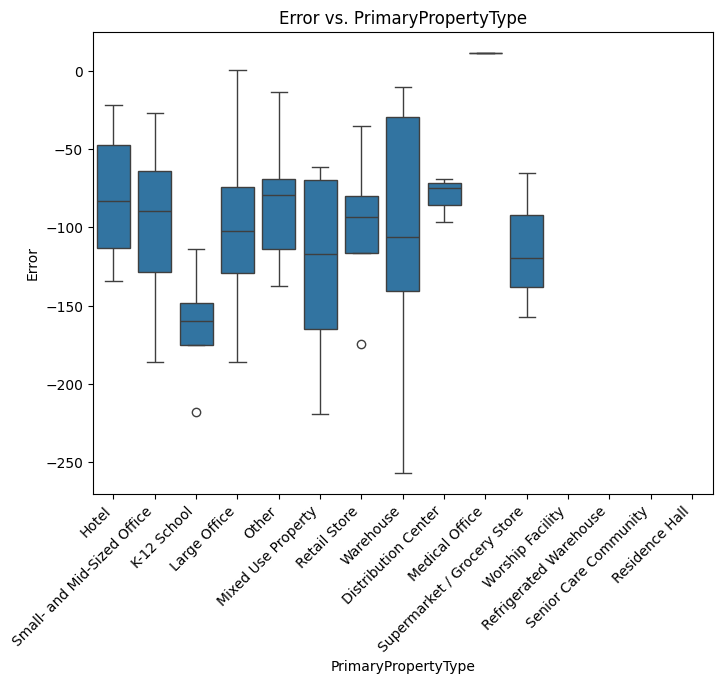

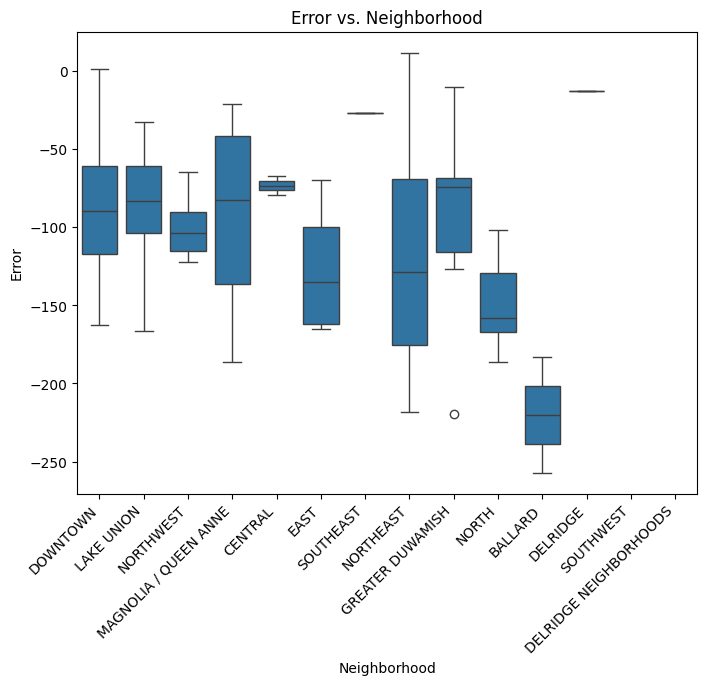

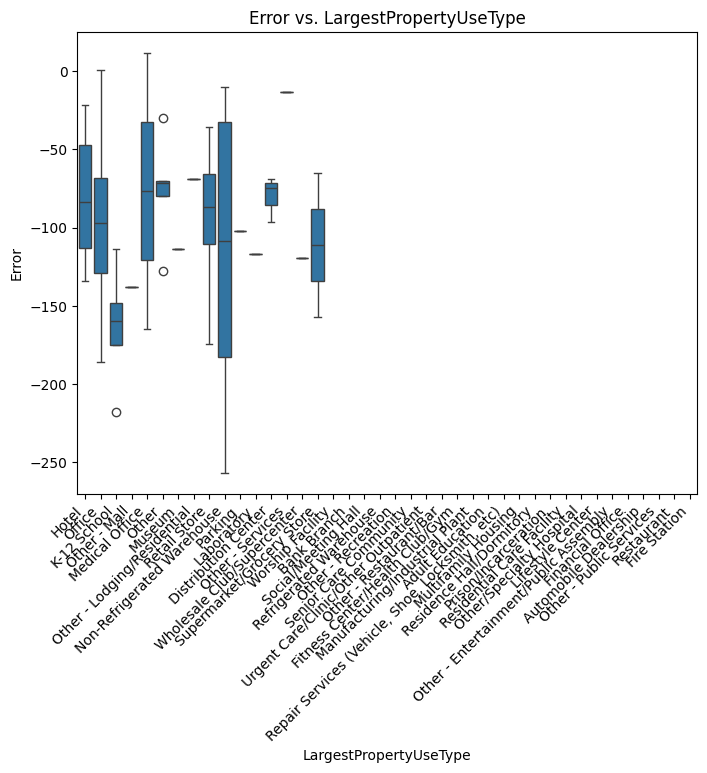

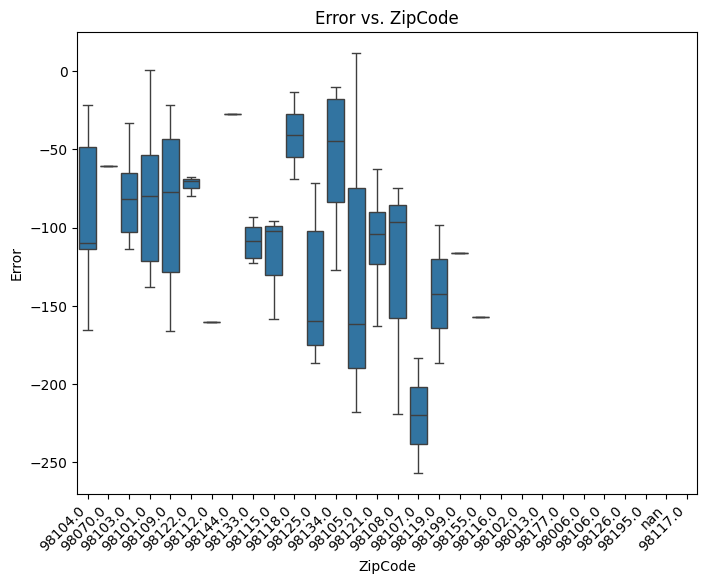

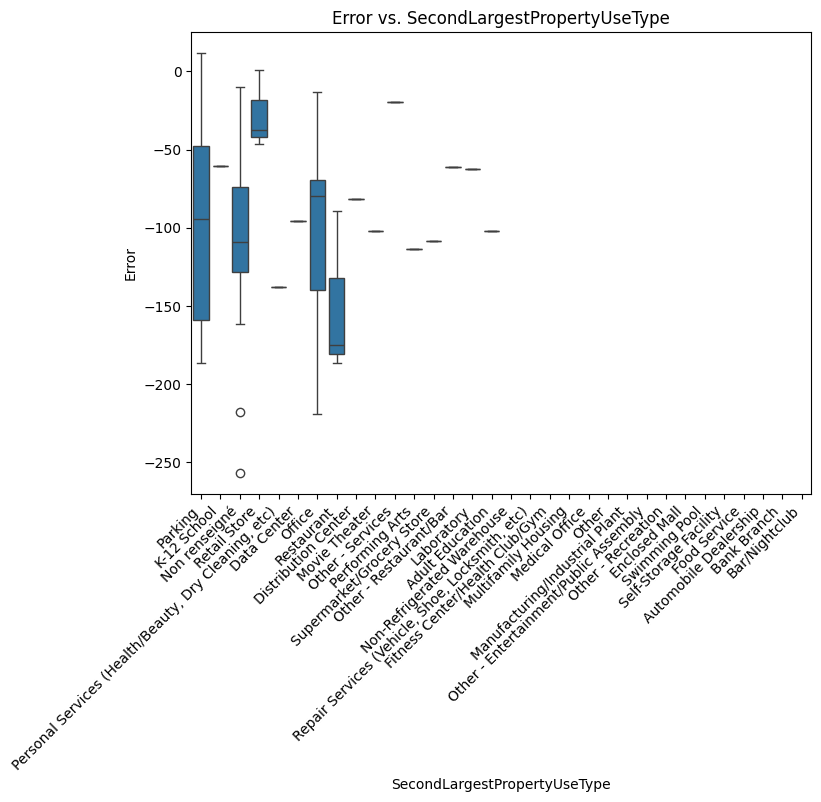

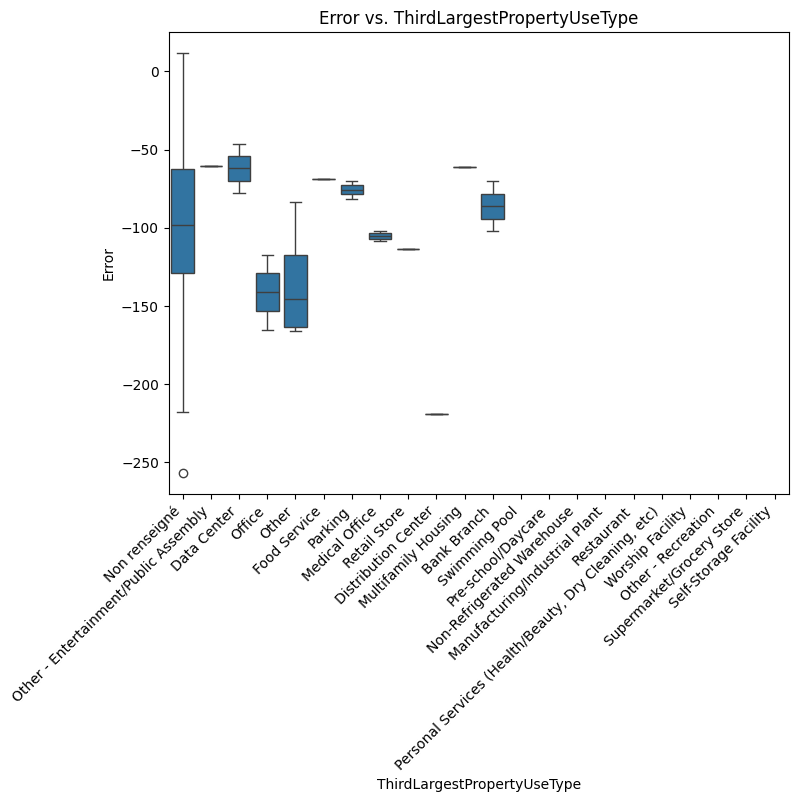

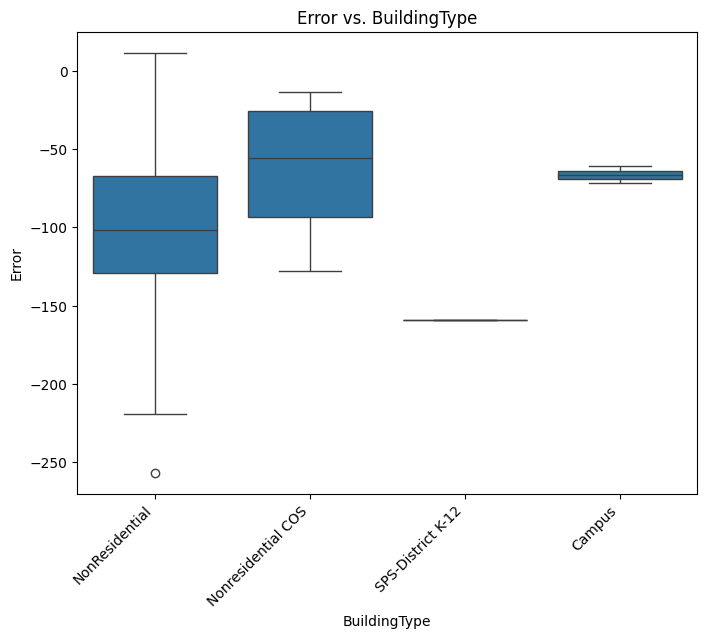

In [95]:
# 2. Calculate errors (residuals)
errors = y_ghg_test - y_pred

# 3. Create a DataFrame with errors and features
errors_df = pd.DataFrame({'Error': errors})
errors_df = pd.concat([errors_df, X_test], axis=1)  # Add original features to the DataFrame

# 4. Visualize errors against numerical features using scatter plots
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Error', data=errors_df)
    plt.title(f'Error vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Error')
    plt.show()

# 5. Visualize errors against categorical features using box plots
for feature in Ordinal_Cols + OneHot_Cols:  # Include both ordinal and one-hot encoded features
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='Error', data=errors_df)
    plt.title(f'Error vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Error')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.show()

## Algorithme complexe

RandomForest_GHG Mean Squared Error (MSE): 14703.329596193485
RandomForest_GHG Root Mean Squared Error (RMSE): 121.2572867756552
RandomForest_GHG R² Score (Accuracy): 0.38
ExtraTrees_GHG Mean Squared Error (MSE): 12797.14619624084
ExtraTrees_GHG Root Mean Squared Error (RMSE): 113.1244721368495
ExtraTrees_GHG R² Score (Accuracy): 0.46


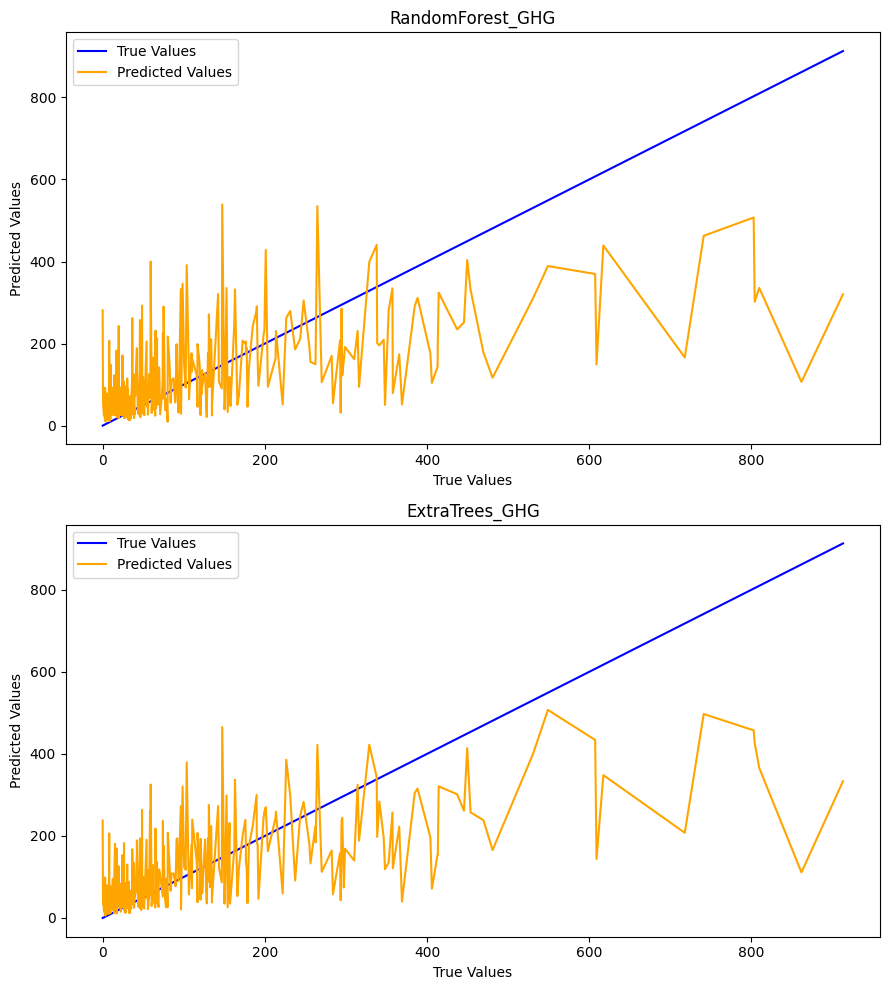

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# Création de la fonction RobustScaler
y_scaler_ghg = RobustScaler()

# Transformation de la variable cible à l'aide du RobustScaler
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Définit les transformers pour le pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Créer le pipeline pour le préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

# Définit le modèle de RandomForestRegressor
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
# Définit le modèle de ExtraTreesRegressor
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)

# Créer le pipeline avec le RandomForestRegressor
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
# Créer le pipeline avec le ExtraTreesRegressor
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(2, 1, figsize=(9, 10))  # Créer une grille de subplots
axes = axes.ravel()  # Aplatir le tableau 2D pour une itération plus facile

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calcul des scores
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)
    r2 = r2_score(y_test_original, y_pred)

    # Imprime les résultats
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Ajuste la mise en page
plt.tight_layout()
plt.show()

Dans cette partie du projet, nous allons donc tester 4 autres algorithmes de prédictions : RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor et SVR. Nous allons ensuite comparer 3 scores de prédiction entre eux : le Mean Squared Error (MSE), le Root Mean Squared Error et le R² Score (Accuracy).

Afin de mieux visualiser l'efficacité de chacun des algorithmes, je vais créer des lineplots qui vont comparer la différence entre les valeurs réelles du jeu de données avec les valeurs prédites par les algorithmes.

RandomForest_GHG Mean Squared Error (MSE): 14703.329596193485
RandomForest_GHG Root Mean Squared Error (RMSE): 121.2572867756552
RandomForest_GHG R² Score (Accuracy): 0.38
ExtraTrees_GHG Mean Squared Error (MSE): 12797.14619624084
ExtraTrees_GHG Root Mean Squared Error (RMSE): 113.1244721368495
ExtraTrees_GHG R² Score (Accuracy): 0.46
ElasticNet_GHG Mean Squared Error (MSE): 19710.97205394676
ElasticNet_GHG Root Mean Squared Error (RMSE): 140.39576935914687
ElasticNet_GHG R² Score (Accuracy): 0.17
SVM_GHG Mean Squared Error (MSE): 25079.385557081823
SVM_GHG Root Mean Squared Error (RMSE): 158.36472320905884
SVM_GHG R² Score (Accuracy): -0.06
GradientBoosting_GHG Mean Squared Error (MSE): 13731.616328958362
GradientBoosting_GHG Root Mean Squared Error (RMSE): 117.18197954019364
GradientBoosting_GHG R² Score (Accuracy): 0.42


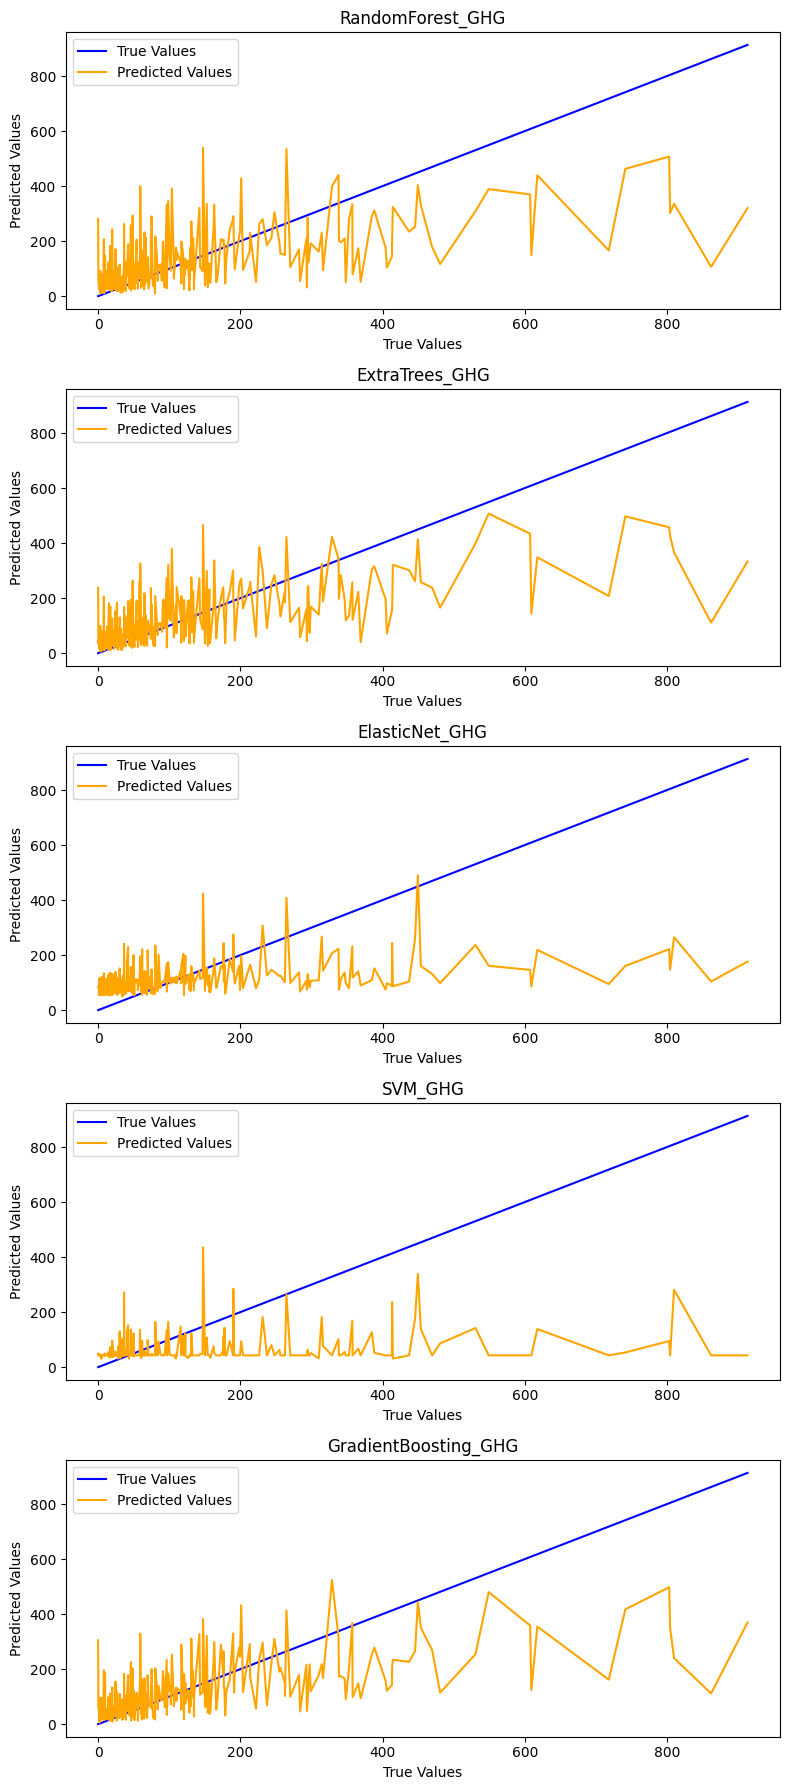

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# y_scaler_site = RobustScaler()
y_scaler_ghg = RobustScaler()

# y_site_scaled = y_scaler_site.fit_transform(y_site.values.reshape(-1, 1)).ravel()
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

#Définit les différents modèles que l'on veut tester
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)
elastic_net_ghg = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
svm_reg_ghg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
gb_reg_ghg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Définit les différents pipelines que l'on veut utiliser
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])
pipeline_en_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', elastic_net_ghg)])
pipeline_svm_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', svm_reg_ghg)])
pipeline_gbr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_reg_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ElasticNet_GHG": (pipeline_en_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "SVM_GHG": (pipeline_svm_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "GradientBoosting_GHG": (pipeline_gbr_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(5, 1, figsize=(8, 18))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Print results
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Explication des graphiques : Prenons l'exemple du graphique représentant les résultats de l'algorithme GradientBoosting. La ligne bleue est une ligne de référence : l'axe des abscisses "True Values" correspond aux vraies valeurs que l'algorithme était supposé prédire, tandis que la ligne orange représente les valeurs prédites par l'algorithme, alors que celles-ci devaient correspondre à la ligne bleue.

Exemple : pour la valeur 200 que l'algorithme était censé prédire pour un individu du jeu de donnée dont la valeur au sein de la colonne TotalGHGEmissions est de 200, l'algorithme a prédit une valeur égale à environ 120. Pour la valeur 400 que l'algorithme était censé prédire pour un individu du jeu de donnée dont la valeur au sein de la colonne TotalGHGEmissions est de 400, l'algorithme a prédit une valeur égale à environ 100, etc...

Ces écarts s'expliquent par la faible quantité de données présente au sein du jeu de données que l'on possède.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# y_scaler_site = RobustScaler()
y_scaler_ghg = RobustScaler()

# y_site_scaled = y_scaler_site.fit_transform(y_site.values.reshape(-1, 1)).ravel()
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

#Définit les différents modèles que l'on veut tester
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)
elastic_net_ghg = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
svm_reg_ghg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
gb_reg_ghg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Définit les différents pipelines que l'on veut utiliser
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])
pipeline_en_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', elastic_net_ghg)])
pipeline_svm_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', svm_reg_ghg)])
pipeline_gbr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_reg_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ElasticNet_GHG": (pipeline_en_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "SVM_GHG": (pipeline_svm_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "GradientBoosting_GHG": (pipeline_gbr_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

results = []

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Append results to the list
    results.append([name, mse, rmse, r2])

# Create a pandas DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R2'])

# Display the DataFrame
display(results_df)

,Model,MSE,RMSE,R2
0,RandomForest_GHG,14703.329596,121.257287,0.377219
1,ExtraTrees_GHG,12797.146196,113.124472,0.457959
2,ElasticNet_GHG,19710.972054,140.395769,0.165114
3,SVM_GHG,25079.385557,158.364723,-0.062273
4,GradientBoosting_GHG,13731.616329,117.181980,0.418378


## Validation croisée (GridSearchCV)

Le meilleur modèle de prédiction que l'on a trouvé est le ExtraTreesRegressor, avec un score R2 de 0.457959, un MSE de 12797.146196 et un RSE de 113.124472. Ce modèle n'est pas très performant, nous allons donc tenter de l'améliorer avec la technique de la validation croisée. Cette technique permet de réduire les biais ainsi que la variance dans l'évaluation des modèles.

In [20]:
# import des bibliothèques utilisées
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import *
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


In [60]:
from sklearn.model_selection import GridSearchCV

results = []

# Create the pipeline with RandomForestRegressor
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', ExtraTreesRegressor(random_state=42))])

# Define the parameter grid for RandomForestRegressor
parameters = {
    'model__n_estimators': [10,20, 50, 100],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10,15],
}

# Create GridSearchCV object
grid = GridSearchCV(pipeline_et_ghg, parameters, cv=5, return_train_score=True,n_jobs=-1)  # n_jobs=-1 uses all available cores

# Fit the model
grid.fit(X_train, y_ghg_train)

# Print the best parameters and score
print('Méthode: ExtraTreesRegressor OneHotEncoder RobustScaler')
print("best score: ", grid.best_score_)
print("best params: ", grid.best_params_)

# Make predictions on the test set
y_pred = grid.predict(X_test)

# Calculate and print evaluation metrics
print("RMSE = ", mean_absolute_error(y_test, y_pred))
print("MAE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("median abs err = ", median_absolute_error(y_test, y_pred))

# Append results to the list
results.append(['ExtraTreesRegressor', grid.best_score_, mean_absolute_error(y_test, y_pred),
                np.sqrt(mean_squared_error(y_test, y_pred)), median_absolute_error(y_test, y_pred),
                grid.best_params_])


Méthode: ExtraTreesRegressor OneHotEncoder RobustScaler
best score:  0.5099540621815476
best params:  {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 100}
RMSE =  0.6300494422950533
MAE =  1.0180087271878693
median abs err =  0.3775966026308692


In [61]:
# Access the cv_results_ attribute
cv_results = grid.cv_results_


df_results = pd.DataFrame(cv_results)
display(df_results)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.140433,0.027892,0.027846,0.006152,None,2,10,"{'model__max_depth': None, 'model__min_samples...",0.469154,0.495343,...,0.423082,0.091273,64,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.329999,0.032933,0.042328,0.002765,None,2,20,"{'model__max_depth': None, 'model__min_samples...",0.540761,0.522042,...,0.475743,0.069101,50,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.683561,0.129584,0.043882,0.014318,None,2,50,"{'model__max_depth': None, 'model__min_samples...",0.577564,0.537080,...,0.500334,0.060270,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.739954,0.019934,0.039408,0.002350,None,2,100,"{'model__max_depth': None, 'model__min_samples...",0.575034,0.535459,...,0.500726,0.060681,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.095861,0.027603,0.017988,0.002283,None,5,10,"{'model__max_depth': None, 'model__min_samples...",0.562075,0.521978,...,0.456613,0.082806,59,0.956653,0.955844,0.955897,0.961989,0.962501,0.958577,0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.450986,0.007597,0.035050,0.001106,30,10,100,"{'model__max_depth': 30, 'model__min_samples_s...",0.572756,0.536580,...,0.509773,0.048902,2,0.866398,0.866121,0.874823,0.875886,0.877657,0.872177,0.004917
60,0.067739,0.003042,0.016787,0.000365,30,15,10,"{'model__max_depth': 30, 'model__min_samples_s...",0.513571,0.465921,...,0.473873,0.046210,53,0.790273,0.790531,0.796235,0.788068,0.815271,0.796076,0.009970
61,0.108727,0.011937,0.018839,0.000778,30,15,20,"{'model__max_depth': 30, 'model__min_samples_s...",0.555928,0.487955,...,0.491680,0.054151,34,0.787790,0.785541,0.799007,0.791837,0.819215,0.796678,0.012164
62,0.217022,0.005564,0.025572,0.001918,30,15,50,"{'model__max_depth': 30, 'model__min_samples_s...",0.560638,0.493971,...,0.492902,0.048964,31,0.787284,0.799944,0.800846,0.798546,0.811805,0.799685,0.007790


Pour avoir un algorithme robuste, il faut que les scores de prédiction sur le jeu de données test et sur le jeu de données d'entrainement ne soit pas trop éloignés. Nous allons donc regarder seulement les modèles paramétrés avec la validation croisée ont un mean_train_score inférieur à 0,75.

In [63]:
display(df_results[df_results["mean_train_score"]<0.75].sort_values(by="mean_test_score"))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
28,0.060007,0.002831,0.017987,0.002325,10,15,10,"{'model__max_depth': 10, 'model__min_samples_s...",0.501477,0.479412,...,0.469479,0.036884,56,0.73729,0.737115,0.746118,0.763126,0.747375,0.746205,0.009485


Le modèle le plus robuste semble donc être celui représenté par la ligne numéro 28 du dataframe df_result que nous venons de créer.

Ce modèle représente le modèle le plus optimal pour notre algorithme de prédiction.

In [64]:
df_results.iloc[28]

,28
mean_fit_time,0.060007
std_fit_time,0.002831
mean_score_time,0.017987
std_score_time,0.002325
param_model__max_depth,10
param_model__min_samples_split,15
param_model__n_estimators,10
params,"{'model__max_depth': 10, 'model__min_samples_s..."
split0_test_score,0.501477
split1_test_score,0.479412


## Importance de la variable EnergyStarScore

On nous demande dans ce projet d'évaluer l'intérêt de la variable EnergyStarScore au sein de notre jeu de données. Nous allons donc répéter toutes les étapes de notre algorithme, en gardant cette fois la variable nommée EnergyStarScore.

In [65]:
#Création d'un dataframe sans les variables de relevés de consommation des bâtiments
df_final=df.copy()
df_final=df_final.drop(['SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'],axis=1)
print(df_final.columns)
display(df_final.info())

#Création du dataframe filtré
df_partial = df_final.copy()
df_partial = df_partial[df_partial["TotalGHGEmissions"] < 1000]
df_partial.describe()

#Séparation des colonnes catégorielles ainsi que des colonnes numériques
objectColumns = list(df.select_dtypes(include=['object']).columns)
numericColumns = list(df.select_dtypes(exclude=['object']).columns)

print(objectColumns)
print(numericColumns)

#Transforme certaines valeurs du dataframe pour rendre les algorithmes plus exploitables et plus efficaces
df_cleaned = df_partial[df_partial['ZipCode'].notna()]
df_cleaned['NumberofBuildings'] = df_cleaned['NumberofBuildings'].replace(0, 1)
df_cleaned['NumberofFloors'] = df_cleaned['NumberofFloors'].replace(0, 1)

display(df_cleaned.info())
display(df_cleaned.describe())

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'BuildingAge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1544 non-null   object 
 1   PrimaryPropertyType              1544 non-null   object 
 2   ZipCode                          1544 non-null   object 
 3   Neighborhood                     1544 non-null   object 
 4   NumberofBuildings                1544 non-null   float64
 5  

None

['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 'BuildingAge']
<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1543
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1503 non-null   object 
 1   PrimaryPropertyType              1503 non-null   object 
 2   ZipCode                          1503 non-null   object 
 3   Neighborhood                     1503 non-null   object 
 4   NumberofBuildings                1503 non-null   float6

None

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge
count,1503.000000,1503.000000,1.503000e+03,1503.000000,1503.000000,1503.000000,973.000000,1.503000e+03,1503.000000,1503.000000
mean,1.113772,4.150366,1.045939e+05,13520.916168,17419.058747,2901.225149,64.004111,6.040374e+06,110.960153,54.585496
std,1.091532,6.652894,1.748851e+05,43414.567856,44359.531705,14179.909515,28.766586,9.328695e+06,153.519124,32.828457
min,1.000000,1.000000,1.128500e+04,0.000000,0.000000,0.000000,1.000000,5.713320e+04,-0.800000,1.000000
25%,1.000000,1.000000,2.872800e+04,0.000000,0.000000,0.000000,44.000000,1.226150e+06,19.910000,28.000000
50%,1.000000,2.000000,4.658000e+04,0.000000,0.000000,0.000000,71.000000,2.595784e+06,48.540000,51.000000
75%,1.000000,4.000000,9.960250e+04,0.000000,13194.000000,0.000000,89.000000,6.751441e+06,131.210000,86.000000
max,27.000000,99.000000,1.952220e+06,512608.000000,389860.000000,303910.000000,100.000000,9.293764e+07,940.470000,116.000000


Remplacer un tiers du jeu de données par la médiane de l'EnergystarScore en fonction de la variable 'PrimaryPropertyType' peut être une bonne idée d'imputation des valeurs pour ne pas perdre une trop grosse partie de notre jeu de données. Nous allons donc essayer cette méthode d'imputation pour regarder les performances de nos algorithmes.

Tous d'abord, regardons la répartition des valeurs pour chacune de nos variables numériques ainsi que leurs moyennes d'EnergystarScore :

                                   mean        std
PrimaryPropertyType                               
Distribution Center           53.725000  31.670570
Hospital                     100.000000        NaN
Hotel                         62.953846  24.504739
K-12 School                   71.979592  26.284097
Laboratory                          NaN        NaN
Large Office                  77.427673  23.237753
Low-Rise Multifamily          32.000000        NaN
Medical Office                42.800000  27.649912
Mixed Use Property            64.120000  30.238386
Other                         56.888889  35.296758
Refrigerated Warehouse        76.800000  21.764650
Residence Hall                63.421053  26.769211
Restaurant                          NaN        NaN
Retail Store                  66.111111  26.483349
Self-Storage Facility               NaN        NaN
Senior Care Community         53.941176  39.781388
Small- and Mid-Sized Office   67.313305  26.486344
Supermarket / Grocery Store   4

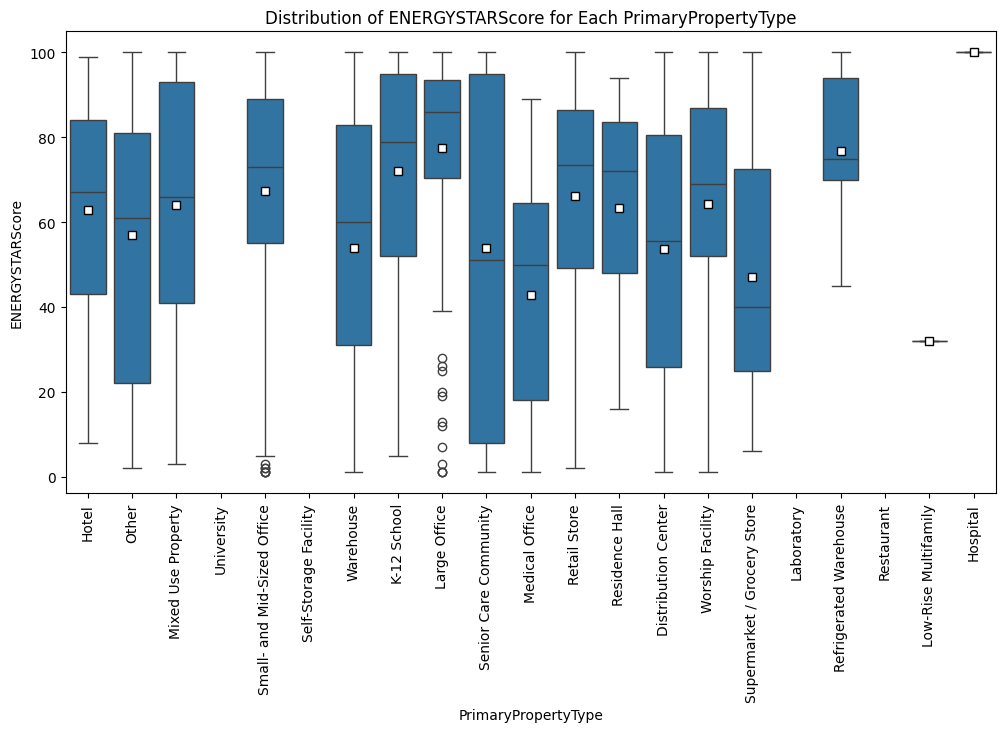

In [66]:
# Group data by PrimaryPropertyType and calculate mean ENERGYSTARScore
property_type_energy_stats = df_cleaned.groupby('PrimaryPropertyType')['ENERGYSTARScore'].agg(['mean', 'std'])

# Display the mean and standard deviation
print(property_type_energy_stats)

# Create box plots for distribution visualization
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='PrimaryPropertyType', y='ENERGYSTARScore', data=df_cleaned, showmeans=True,
                 meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of ENERGYSTARScore for Each PrimaryPropertyType')
plt.show()

In [67]:
# Group data by PrimaryPropertyType and calculate median ENERGYSTARScore
property_type_median = df_cleaned.groupby('PrimaryPropertyType')['ENERGYSTARScore'].median()

# Impute missing values using the median for each property type
df_cleaned['ENERGYSTARScore'] = df_cleaned.groupby('PrimaryPropertyType')['ENERGYSTARScore'].transform(lambda x: x.fillna(x.median()))

# Verify if there are any remaining missing values
print(df_cleaned['ENERGYSTARScore'].isnull().sum())

64


Après imputation par la médiane, il ne reste plus que 64 valeurs nulles au sein de la colonne EnergyStarScore, car notre jeu de données possède des individus avec des valeurs de PrimaryPropertyType qui n'ont aucune valeur de EnergyStarScore. Ce nombre étant relativement faible au sein de notre jeu de données, nous allons donc les supprimer de notre dataframe.

In [68]:
df_cleaned = df_cleaned.dropna(subset=['ENERGYSTARScore'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 0 to 1543
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1439 non-null   object 
 1   PrimaryPropertyType              1439 non-null   object 
 2   ZipCode                          1439 non-null   object 
 3   Neighborhood                     1439 non-null   object 
 4   NumberofBuildings                1439 non-null   float64
 5   NumberofFloors                   1439 non-null   int64  
 6   PropertyGFATotal                 1439 non-null   int64  
 7   PropertyGFAParking               1439 non-null   int64  
 8   LargestPropertyUseType           1439 non-null   object 
 9   SecondLargestPropertyUseType     1439 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  1439 non-null   float64
 11  ThirdLargestPropertyUseType      1439 non-null   object 
 12  ThirdLargestPropertyUseTy

Enfin, nous allons maintenant tester à nouveau les algorithmes de prédiction que nous avons essayé précedemment.

In [69]:
Ordinal_Cols = ['PrimaryPropertyType','Neighborhood','LargestPropertyUseType','ZipCode','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
OneHot_Cols = ['BuildingType']
# y_site = df_cleaned["SiteEnergyUse(kBtu)"]
y_ghg = df_cleaned["TotalGHGEmissions"]
X = df_cleaned.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)
numerical_cols = X.select_dtypes(include=['number']).columns

In [70]:
# Création de la fonction RobustScaler
y_scaler_ghg = RobustScaler()

# Transformation de la variable cible à l'aide du RobustScaler
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Définit les transformers pour le pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Créer le pipeline pour le préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)


In [71]:
# Définit le modèle de régression linéaire
linear_reg = LinearRegression()


# Créer le pipeline avec la régression linéaire
pipeline_lr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', linear_reg)])

pipeline_lr_ghg.fit(X_train, y_ghg_train)

y_pred_scaled = pipeline_lr_ghg.predict(X_test)
y_pred = y_scaler_ghg.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = y_scaler_ghg.inverse_transform(y_ghg_test.reshape(-1, 1)).ravel()

# Calcule les métriques
mse = mean_squared_error(y_test_original, y_pred)
rmse = root_mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Imprime les résultats
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R² Score (Accuracy):",r2)

Mean Squared Error (MSE): 15380.2346557234
Root Mean Squared Error (RMSE): 124.01707404919453
R² Score (Accuracy): 0.29163084140671314


L'algorithme de régression linéaire semble être légèrement plus efficace lorsqu'on utilise la variable EnergyStarScore, avec les scores suivants :    
- Mean Squared Error (MSE): 15380.2346557234 (17211.34637827151 précedemment),

- Root Mean Squared Error (RMSE): 124.01707404919453 (131.192021016034 précedemment),

- R² Score (Accuracy): 0.29163084140671314
(0.27098882837803917 précedemment)

Regardons maintenant son efficacité pour les autres algorithmes de prédiction.

### Algorithmes plus complexes

RandomForest_GHG Mean Squared Error (MSE): 13568.865491703473
RandomForest_GHG Root Mean Squared Error (RMSE): 116.48547330763382
RandomForest_GHG R² Score (Accuracy): 0.38
ExtraTrees_GHG Mean Squared Error (MSE): 13103.794608231929
ExtraTrees_GHG Root Mean Squared Error (RMSE): 114.47180704536785
ExtraTrees_GHG R² Score (Accuracy): 0.40
ElasticNet_GHG Mean Squared Error (MSE): 17390.050953079997
ElasticNet_GHG Root Mean Squared Error (RMSE): 131.87134242541097
ElasticNet_GHG R² Score (Accuracy): 0.20
SVM_GHG Mean Squared Error (MSE): 22045.53296617719
SVM_GHG Root Mean Squared Error (RMSE): 148.4773820020315
SVM_GHG R² Score (Accuracy): -0.02
GradientBoosting_GHG Mean Squared Error (MSE): 11822.829609310456
GradientBoosting_GHG Root Mean Squared Error (RMSE): 108.73283592967883
GradientBoosting_GHG R² Score (Accuracy): 0.46


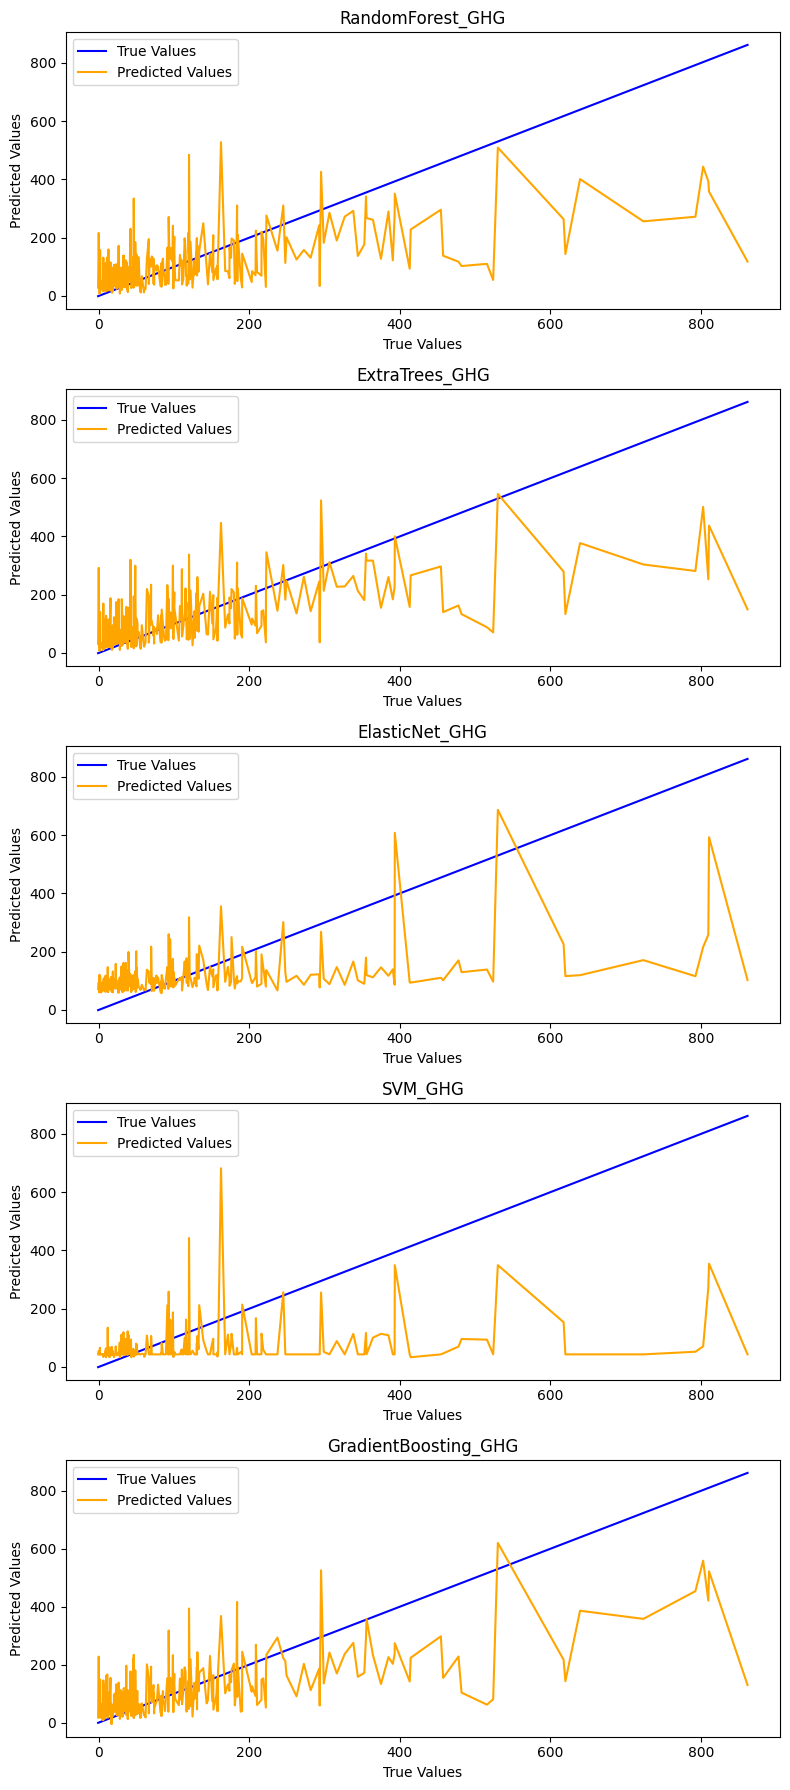

In [40]:
# y_scaler_site = RobustScaler()
y_scaler_ghg = RobustScaler()

# y_site_scaled = y_scaler_site.fit_transform(y_site.values.reshape(-1, 1)).ravel()
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

#Définit les différents modèles que l'on veut tester
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)
elastic_net_ghg = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
svm_reg_ghg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
gb_reg_ghg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Définit les différents pipelines que l'on veut utiliser
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])
pipeline_en_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', elastic_net_ghg)])
pipeline_svm_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', svm_reg_ghg)])
pipeline_gbr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_reg_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ElasticNet_GHG": (pipeline_en_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "SVM_GHG": (pipeline_svm_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "GradientBoosting_GHG": (pipeline_gbr_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(5, 1, figsize=(8, 18))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Print results
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Les scores des autres algorithmes semblent légèrement meilleurs qu’avant l’ajout de la variable EnergyStarScore, à l’exception de l’algorithme ExtraTreesRegressor. Pour approfondir cette analyse, utilisons la validation croisée afin de déterminer si nous pouvons obtenir un modèle plus performant que celui utilisé précédemment, à savoir GradientBoosting, qui semblait légèrement surpasser ExtraTreesRegressor sur notre ancien jeu de données (sans la variable EnergyStarScore).

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# y_scaler_site = RobustScaler()
y_scaler_ghg = RobustScaler()

# y_site_scaled = y_scaler_site.fit_transform(y_site.values.reshape(-1, 1)).ravel()
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

#Définit les différents modèles que l'on veut tester
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)
elastic_net_ghg = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
svm_reg_ghg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
gb_reg_ghg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Définit les différents pipelines que l'on veut utiliser
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])
pipeline_en_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', elastic_net_ghg)])
pipeline_svm_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', svm_reg_ghg)])
pipeline_gbr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_reg_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ElasticNet_GHG": (pipeline_en_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "SVM_GHG": (pipeline_svm_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "GradientBoosting_GHG": (pipeline_gbr_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

results = []

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Append results to the list
    results.append([name, mse, rmse, r2])

# Create a pandas DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R2'])

# Display the DataFrame
display(results_df)

,Model,MSE,RMSE,R2
0,RandomForest_GHG,13568.865492,116.485473,0.375057
1,ExtraTrees_GHG,13103.794608,114.471807,0.396477
2,ElasticNet_GHG,17390.050953,131.871342,0.199065
3,SVM_GHG,22045.532966,148.477382,-0.015354
4,GradientBoosting_GHG,11822.829609,108.732836,0.455475


### GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

results = []

# Create the pipeline with RandomForestRegressor
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', ExtraTreesRegressor(random_state=42))])

# Define the parameter grid for RandomForestRegressor
parameters = {
    'model__n_estimators': [10,20, 50, 100],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5, 10,15],
}

# Create GridSearchCV object
grid = GridSearchCV(pipeline_et_ghg, parameters, cv=5, return_train_score=True,n_jobs=-1)  # n_jobs=-1 uses all available cores

# Fit the model
grid.fit(X_train, y_ghg_train)

# Print the best parameters and score
print('Méthode: ExtraTreesRegressor OneHotEncoder RobustScaler')
print("best score: ", grid.best_score_)
print("best params: ", grid.best_params_)

# Make predictions on the test set
y_pred = grid.predict(X_test)

# Calculate and print evaluation metrics
print("RMSE = ", mean_absolute_error(y_test, y_pred))
print("MAE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("median abs err = ", median_absolute_error(y_test, y_pred))

# Append results to the list
results.append(['ExtraTreesRegressor', grid.best_score_, mean_absolute_error(y_test, y_pred),
                np.sqrt(mean_squared_error(y_test, y_pred)), median_absolute_error(y_test, y_pred),
                grid.best_params_])


Méthode: ExtraTreesRegressor OneHotEncoder RobustScaler
best score:  0.5099540621815476
best params:  {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 100}
RMSE =  0.6300494422950533
MAE =  1.0180087271878693
median abs err =  0.3775966026308692


In [55]:
from sklearn.model_selection import GridSearchCV

results = []

# Create the pipeline with GradientBoostingRegressor
pipeline_gbr_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
)])

# Define the parameter grid for GradientBoostingRegressor
parameters = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid2 = GridSearchCV(pipeline_gbr_ghg, parameters, cv=5, return_train_score=True,n_jobs=-1)  # n_jobs=-1 uses all available cores

# Fit the model
grid2.fit(X_train, y_ghg_train)

# Print the best parameters and score
print('Méthode: GradientBoostingRegressor OneHotEncoder RobustScaler')
print("best score: ", grid2.best_score_)
print("best params: ", grid2.best_params_)

# Make predictions on the test set
y_pred = grid2.predict(X_test)

# Calculate and print evaluation metrics
print("RMSE = ", mean_absolute_error(y_test, y_pred))
print("MAE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("median abs err = ", median_absolute_error(y_test, y_pred))

# Append results to the list
results.append(['GradientBoostingRegressor', grid2.best_score_, mean_absolute_error(y_test, y_pred),
                np.sqrt(mean_squared_error(y_test, y_pred)), median_absolute_error(y_test, y_pred),
                grid2.best_params_])


Méthode: GradientBoostingRegressor OneHotEncoder RobustScaler
best score:  0.47109268413567235
best params:  {'model__max_depth': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100}
RMSE =  0.6162909990916589
MAE =  0.9827624360961572
median abs err =  0.39674241953991823


In [56]:
# Access the cv_results_ attribute for grid et grid2
cv_results_et = grid.cv_results_
cv_results_grb = grid2.cv_results_

df_results_et = pd.DataFrame(cv_results_et)
df_results_grb = pd.DataFrame(cv_results_grb)

display(df_results_et)
display(df_results_grb)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103331,0.005120,0.022139,0.006812,None,2,10,"{'model__max_depth': None, 'model__min_samples...",0.469154,0.495343,...,0.423082,0.091273,64,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.169110,0.002676,0.021630,0.003590,None,2,20,"{'model__max_depth': None, 'model__min_samples...",0.540761,0.522042,...,0.475743,0.069101,50,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.391709,0.010541,0.027799,0.001336,None,2,50,"{'model__max_depth': None, 'model__min_samples...",0.577564,0.537080,...,0.500334,0.060270,16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.757136,0.016027,0.040926,0.001836,None,2,100,"{'model__max_depth': None, 'model__min_samples...",0.575034,0.535459,...,0.500726,0.060681,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.077355,0.002555,0.016524,0.000286,None,5,10,"{'model__max_depth': None, 'model__min_samples...",0.562075,0.521978,...,0.456613,0.082806,59,0.956653,0.955844,0.955897,0.961989,0.962501,0.958577,0.003013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.286261,0.276479,0.105502,0.026110,30,10,100,"{'model__max_depth': 30, 'model__min_samples_s...",0.572756,0.536580,...,0.509773,0.048902,2,0.866398,0.866121,0.874823,0.875886,0.877657,0.872177,0.004917
60,0.247877,0.016339,0.065445,0.012776,30,15,10,"{'model__max_depth': 30, 'model__min_samples_s...",0.513571,0.465921,...,0.473873,0.046210,53,0.790273,0.790531,0.796235,0.788068,0.815271,0.796076,0.009970
61,0.390208,0.032115,0.062665,0.012754,30,15,20,"{'model__max_depth': 30, 'model__min_samples_s...",0.555928,0.487955,...,0.491680,0.054151,34,0.787790,0.785541,0.799007,0.791837,0.819215,0.796678,0.012164
62,0.791934,0.153096,0.078473,0.030477,30,15,50,"{'model__max_depth': 30, 'model__min_samples_s...",0.560638,0.493971,...,0.492902,0.048964,31,0.787284,0.799944,0.800846,0.798546,0.811805,0.799685,0.007790


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.412217,0.081229,0.024601,0.011778,3,2,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.508177,0.471684,...,0.461383,0.035622,6,0.721224,0.724435,0.742105,0.721402,0.740294,0.729892,0.009320
1,0.668810,0.073471,0.031243,0.015700,3,2,100,"{'model__max_depth': 3, 'model__min_samples_sp...",0.544484,0.483976,...,0.471093,0.052880,1,0.806158,0.812496,0.824598,0.808872,0.825160,0.815457,0.007954
2,1.253080,0.294916,0.037840,0.021168,3,2,200,"{'model__max_depth': 3, 'model__min_samples_sp...",0.541865,0.461781,...,0.447809,0.066643,19,0.892150,0.898988,0.900061,0.906965,0.901046,0.899842,0.004736
3,0.524340,0.122723,0.041882,0.020638,3,5,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.496756,0.472030,...,0.455307,0.031688,12,0.719338,0.724997,0.739316,0.722849,0.738843,0.729069,0.008372
4,1.366967,0.180662,0.064402,0.040004,3,5,100,"{'model__max_depth': 3, 'model__min_samples_sp...",0.523730,0.494154,...,0.464219,0.050140,5,0.804451,0.815282,0.823640,0.809288,0.822959,0.815124,0.007509
5,1.513322,0.456731,0.034296,0.009286,3,5,200,"{'model__max_depth': 3, 'model__min_samples_sp...",0.529980,0.482711,...,0.451942,0.061042,17,0.882533,0.896595,0.892951,0.904913,0.899597,0.895318,0.007498
6,0.354989,0.082884,0.024951,0.009111,3,10,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.513666,0.466489,...,0.460732,0.043889,7,0.707947,0.722002,0.735055,0.710980,0.719269,0.719051,0.009522
7,0.644615,0.075807,0.026294,0.010065,3,10,100,"{'model__max_depth': 3, 'model__min_samples_sp...",0.542069,0.486970,...,0.465997,0.058027,3,0.793182,0.806240,0.822019,0.791917,0.797996,0.802271,0.011080
8,1.210418,0.160011,0.019445,0.006577,3,10,200,"{'model__max_depth': 3, 'model__min_samples_sp...",0.554115,0.490913,...,0.455622,0.073131,11,0.878944,0.889586,0.886711,0.892920,0.882755,0.886183,0.004928
9,0.476334,0.101812,0.028771,0.020843,5,2,50,"{'model__max_depth': 5, 'model__min_samples_sp...",0.525944,0.539191,...,0.459932,0.070387,8,0.902260,0.906058,0.904535,0.911987,0.895954,0.904159,0.005214


Pour avoir un algorithme robuste, il faut que les scores de prédiction sur le jeu de données test et sur le jeu de données d'entrainement ne soit pas trop éloignés. Nous allons donc regarder seulement les modèles paramétrés avec la validation croisée ont un mean_train_score inférieur à 0,8.

In [58]:
display(df_results_et[df_results_et["mean_train_score"]<0.8].sort_values(by="mean_test_score"))
display(df_results_grb[df_results_grb["mean_train_score"]<0.8].sort_values(by="mean_test_score"))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
28,0.103408,0.030367,0.031240,0.013727,10,15,10,"{'model__max_depth': 10, 'model__min_samples_s...",0.501477,0.479412,...,0.469479,0.036884,56,0.737290,0.737115,0.746118,0.763126,0.747375,0.746205,0.009485
12,0.125689,0.025503,0.028256,0.005010,None,15,10,"{'model__max_depth': None, 'model__min_samples...",0.513571,0.465921,...,0.473873,0.046210,53,0.790273,0.790531,0.796235,0.788068,0.815271,0.796076,0.009970
60,0.247877,0.016339,0.065445,0.012776,30,15,10,"{'model__max_depth': 30, 'model__min_samples_s...",0.513571,0.465921,...,0.473873,0.046210,53,0.790273,0.790531,0.796235,0.788068,0.815271,0.796076,0.009970
29,0.172069,0.044287,0.034913,0.009733,10,15,20,"{'model__max_depth': 10, 'model__min_samples_s...",0.534528,0.495090,...,0.481189,0.041680,46,0.740387,0.748106,0.740362,0.763736,0.765275,0.751573,0.010941
44,0.151952,0.064699,0.042087,0.016117,20,15,10,"{'model__max_depth': 20, 'model__min_samples_s...",0.539178,0.526498,...,0.487001,0.052257,41,0.787231,0.771818,0.798328,0.797007,0.798788,0.790634,0.010314
30,0.420790,0.137216,0.066571,0.036555,10,15,50,"{'model__max_depth': 10, 'model__min_samples_s...",0.536589,0.510755,...,0.488579,0.040822,39,0.740675,0.750867,0.752155,0.762031,0.759733,0.753092,0.007537
31,0.968841,0.068622,0.099327,0.007374,10,15,100,"{'model__max_depth': 10, 'model__min_samples_s...",0.544330,0.513653,...,0.489859,0.044655,38,0.743341,0.750948,0.756157,0.761120,0.766562,0.755626,0.008036
13,0.246318,0.046181,0.048367,0.030919,None,15,20,"{'model__max_depth': None, 'model__min_samples...",0.555928,0.487955,...,0.491680,0.054151,34,0.787790,0.785541,0.799007,0.791837,0.819215,0.796678,0.012164
61,0.390208,0.032115,0.062665,0.012754,30,15,20,"{'model__max_depth': 30, 'model__min_samples_s...",0.555928,0.487955,...,0.491680,0.054151,34,0.787790,0.785541,0.799007,0.791837,0.819215,0.796678,0.012164
14,0.418845,0.080471,0.048471,0.012374,None,15,50,"{'model__max_depth': None, 'model__min_samples...",0.560638,0.493971,...,0.492902,0.048964,31,0.787284,0.799944,0.800846,0.798546,0.811805,0.799685,0.007790


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.524340,0.122723,0.041882,0.020638,3,5,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.496756,0.472030,...,0.455307,0.031688,12,0.719338,0.724997,0.739316,0.722849,0.738843,0.729069,0.008372
6,0.354989,0.082884,0.024951,0.009111,3,10,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.513666,0.466489,...,0.460732,0.043889,7,0.707947,0.722002,0.735055,0.710980,0.719269,0.719051,0.009522
0,0.412217,0.081229,0.024601,0.011778,3,2,50,"{'model__max_depth': 3, 'model__min_samples_sp...",0.508177,0.471684,...,0.461383,0.035622,6,0.721224,0.724435,0.742105,0.721402,0.740294,0.729892,0.009320


Afin d'avoir des modèles les plus robustes possibles, je me tournerais vers le choix de la ligne 30 pour le premier modèle, ainsi que de la ligne 0 pour le deuxième modèle, les écarts entre les scores de test et les scores d'entrainement étant les plus faibles, tout en possédant des scores de test suffisament élevés.

In [73]:
display(df_results_et.iloc[28])
display(df_results_grb.iloc[0])

,28
mean_fit_time,0.103408
std_fit_time,0.030367
mean_score_time,0.03124
std_score_time,0.013727
param_model__max_depth,10
param_model__min_samples_split,15
param_model__n_estimators,10
params,"{'model__max_depth': 10, 'model__min_samples_s..."
split0_test_score,0.501477
split1_test_score,0.479412


,0
mean_fit_time,0.412217
std_fit_time,0.081229
mean_score_time,0.024601
std_score_time,0.011778
param_model__max_depth,3
param_model__min_samples_split,2
param_model__n_estimators,50
params,"{'model__max_depth': 3, 'model__min_samples_sp..."
split0_test_score,0.508177
split1_test_score,0.471684


## Feature Importance

Enfin, nous allons étudier les features importances de manière globale ainsi que de manière locale, en utilisant la méthode SHAP.

In [88]:
df_fi=df_cleaned.copy()
df_cleaned_numeric = df_fi.select_dtypes(include=['number'])
print(df_cleaned_numeric)

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
3                   1.0              10             61320                   0   
4                   1.0              18            175580               62000   
5                   1.0               2             97288               37198   
...                 ...             ...               ...                 ...   
1539                1.0               1             18261                   0   
1540                1.0               1             16000                   0   
1541                1.0               1             13157                   0   
1542                1.0               1             14101                   0   
1543                1.0               1             18258                   0   

      SecondLargestProperty

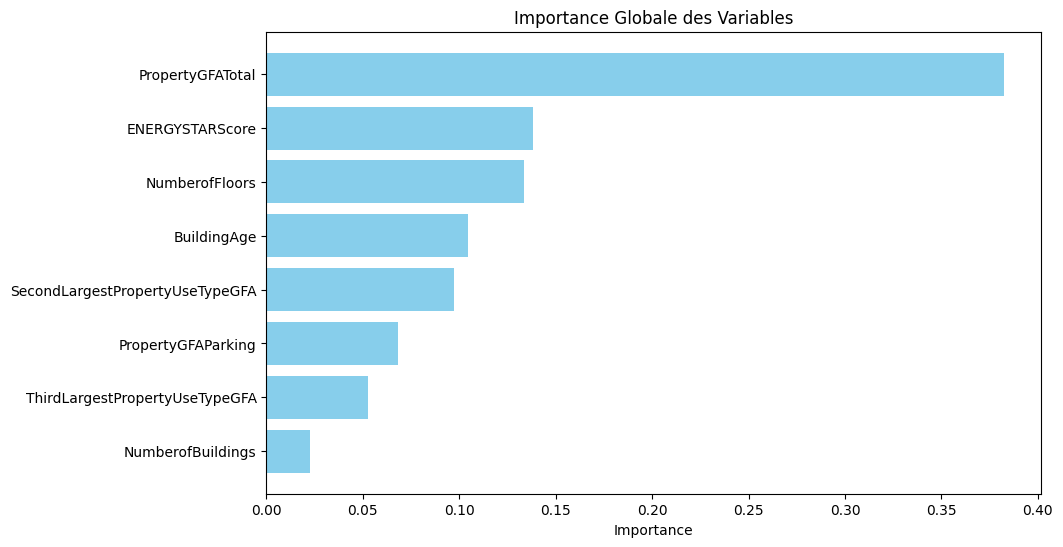

In [89]:
y_ghg_fi = df_cleaned_numeric["TotalGHGEmissions"]
X_fi = df_cleaned_numeric.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)

X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(
    X_fi, y_ghg_fi, test_size=0.25, random_state=42
)
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_fi, y_ghg_fi)

# Importance globale des variables
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_fi.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance Globale des Variables')
plt.gca().invert_yaxis()
plt.show()

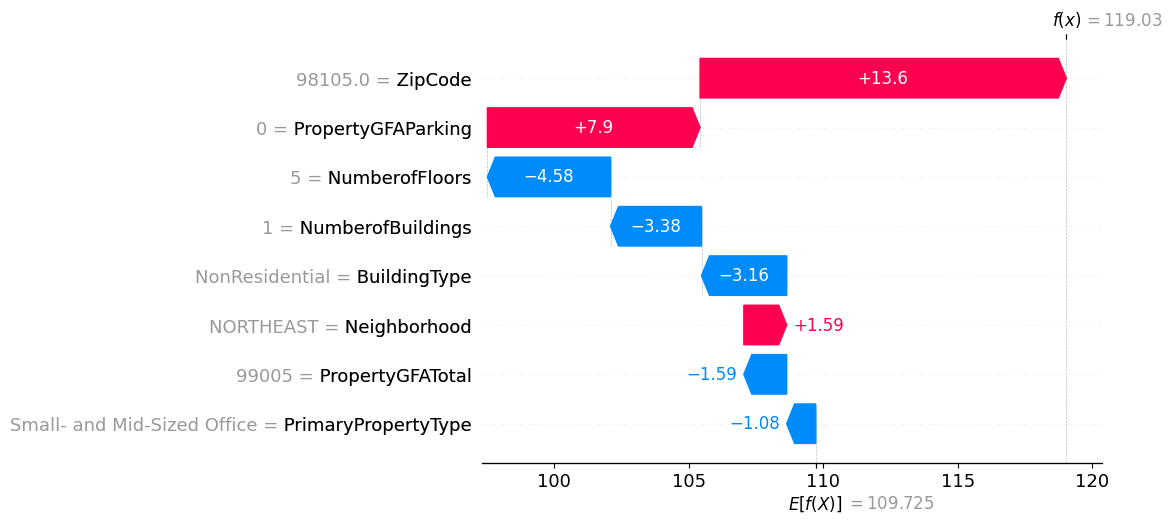

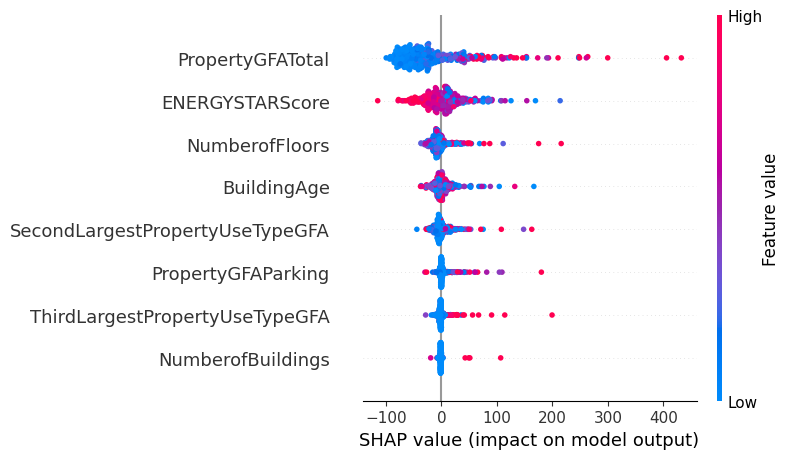

In [92]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a specific instance or a set of instances
shap_values = explainer.shap_values(X_test_fi)  # Replace X_test with your desired data

# Create the Explanation object
explanation = shap.Explanation(values=shap_values,
                                 base_values=explainer.expected_value,
                                 data=X_test,
                                 feature_names=X_test.columns)

# Visualize local feature importances for a single instance (e.g., the first instance in X_test)
shap.plots.waterfall(explanation[0])  # Example for a waterfall plot

# Or, visualize local feature importances for all instances in X_test
shap.summary_plot(shap_values, X_test_fi)

In [83]:
df_fi=df_cleaned.copy()
df_cleaned_numeric = df_cleaned.select_dtypes(include=['number'])
print(df_cleaned_numeric)

# 1. RobustScaler pour les colonnes numériques
scaler = RobustScaler()
df_fi_num = pd.DataFrame(scaler.fit_transform(df_fi[numerical_cols]), columns=numerical_cols, index=df_fi.index)

# 2. OrdinalEncoder pour les colonnes ordinales
encoder_ord = OrdinalEncoder()
df_fi_ord = pd.DataFrame(encoder_ord.fit_transform(df_fi[Ordinal_Cols]), columns=Ordinal_Cols, index=df_fi.index)

# 3. OneHotEncoder pour les colonnes OneHot
encoder_onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False pour la sortie DataFrame
df_fi_onehot = pd.DataFrame(encoder_onehot.fit_transform(df_fi[OneHot_Cols]),
                              columns=encoder_onehot.get_feature_names_out(OneHot_Cols),
                              index=df_fi.index)

df_test_transformed = pd.concat([df_fi_num, df_fi_ord], axis=1)
df_test_transformed = pd.concat([df_test_transformed, df_fi_onehot], axis=1)
print(df_test_transformed.head())


   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                0.0        3.333333          0.576094                 0.0   
1                0.0        3.000000          0.785477             15064.0   
3                0.0        2.666667          0.200915                 0.0   
4                0.0        5.333333          1.781941             62000.0   
5                0.0        0.000000          0.698607             37198.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                        -0.074518                             0.0   
1                         1.020647                          4622.0   
3                        -0.074518                             0.0   
4                         4.869793                             0.0   
5                        -0.074518                             0.0   

   ENERGYSTARScore  BuildingAge  PrimaryPropertyType  Neighborhood  \
0        -0.250000     0.672414         

In [78]:
print(numerical_cols)
print(Ordinal_Cols)
print(OneHot_Cols)

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'BuildingAge'],
      dtype='object')
['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'ZipCode', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
['BuildingType']


In [76]:
# Rappel des variables
# y_ghg = df_cleaned["TotalGHGEmissions"]
# X = df_cleaned.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)
# # Modèle RandomForest

Ordinal_Cols = ['PrimaryPropertyType','Neighborhood','LargestPropertyUseType','ZipCode','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
OneHot_Cols = ['BuildingType']
numerical_cols = X.select_dtypes(include=['number']).columns

df_ft=df_cleaned.copy()
y_ghg = df_ft["TotalGHGEmissions"]
X = df_ft.drop("TotalGHGEmissions", axis=1)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y_ghg)

# Importance globale des variables
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Importance Globale des Variables')
plt.gca().invert_yaxis()
plt.show()


ValueError: could not convert string to float: 'NonResidential'

In [107]:
import shap

# Extrayez le modèle du pipeline
model = pipeline_et_ghg.predict_proba
preprocessor = pipeline_et_ghg.named_steps['preprocessor']

# Créez un explainer SHAP en utilisant votre modèle ajusté
explainer = shap.Explainer(pipeline_et_ghg, X_train)

# Créez une fonction qui prend les données en entrée et renvoie les prédictions du modèle
def model_predict(data):
  data_transformed = preprocessor.transform(data)
  return model.predict(data_transformed)
# Calculez les valeurs SHAP pour vos données de test
shap_values = explainer(X_test)

# Affichez l'importance des caractéristiques
shap.summary_plot(shap_values, X_test, plot_type="bar")

AttributeError: This 'Pipeline' has no attribute 'predict_proba'

In [ ]:
model = make_pipeline(preprocessor,ElasticNet(max_iter=10000,tol=100))
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
l1_ratio = np.logspace(-5, 1, n_alphas)
parameters = {'elasticnet__alpha':alphas,  'elasticnet__l1_ratio':l1_ratio}
grid = GridSearchCV(model,parameters, cv=5, n_jobs = 5)
grid.fit(X_train, y_ghg_train)
y_pred = grid.predict(X_test)
print('Méthode: ElasticNet OneHotEncoder RobustScaler')
print ("best score: ", grid.best_score_)
print("best params: ",grid.best_params_)
print("score de la prédiction:"),
print("RMSE = ",mean_absolute_error(y_test,y_pred))
print("MAE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("median abs err = ",median_absolute_error(y_test,y_pred))

results.append(['ElasticNet', grid.best_score_,mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),median_absolute_error(y_test,y_pred), grid.best_params_])

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'ENERGYSTARScore'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'ENERGYSTARScore'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 652, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 586, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 992, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 551, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_ghg = ["TotalGHGEmissions"]
X = df_partial.drop(y_ghg, axis=1)

y_scaler_ghg = RobustScaler()

y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X,y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
# ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numericColumns),
        ('onehot', onehot_transformer, objectColumns)
    ]
)

# random_forest_site = RandomForestRegressor(n_estimators=50,random_state=42)
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
# extra_trees_site = ExtraTreesRegressor(n_estimators=50,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)

# pipeline_rf_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_site)])
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
# pipeline_et_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_site)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Print results
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'values'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_ghg = df_partial["TotalGHGEmissions"]
X = df_partial.drop("TotalGHGEmissions", axis=1)

y_scaler_ghg = RobustScaler()

y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_ghg_train, y_ghg_test = train_test_split(
    X,y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
# ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numericColumns),
        ('onehot', onehot_transformer, objectColumns)
    ]
)

# random_forest_site = RandomForestRegressor(n_estimators=50,random_state=42)
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
# extra_trees_site = ExtraTreesRegressor(n_estimators=50,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)

# pipeline_rf_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_site)])
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
# pipeline_et_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_site)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])

pipelines = {
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Print results
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:


Ordinal_Cols = ['PrimaryPropertyType','Neighborhood','LargestPropertyUseType']
OneHot_Cols = ['BuildingType']
y_site = df_partial["SiteEnergyUse(kBtu)"]
y_ghg = df_partial["TotalGHGEmissions"]
X = df_partial.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"],axis=1)
numerical_cols = X.select_dtypes(include=['number']).columns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_scaler_site = RobustScaler()
y_scaler_ghg = RobustScaler()

y_site_scaled = y_scaler_site.fit_transform(y_site.values.reshape(-1, 1)).ravel()
y_ghg_scaled = y_scaler_ghg.fit_transform(y_ghg.values.reshape(-1, 1)).ravel()

X_train, X_test, y_site_train, y_site_test, y_ghg_train, y_ghg_test = train_test_split(
    X, y_site_scaled, y_ghg_scaled, test_size=0.25, random_state=42
)

# Define transformers for the pipeline
numerical_transformer = RobustScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, Ordinal_Cols),
        ('onehot', onehot_transformer, OneHot_Cols)
    ]
)

random_forest_site = RandomForestRegressor(n_estimators=50,random_state=42)
random_forest_ghg = RandomForestRegressor(n_estimators=20,random_state=42)
extra_trees_site = ExtraTreesRegressor(n_estimators=50,random_state=42)
extra_trees_ghg = ExtraTreesRegressor(n_estimators=90,random_state=42)

pipeline_rf_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_site)])
pipeline_rf_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', random_forest_ghg)])
pipeline_et_site = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_site)])
pipeline_et_ghg = Pipeline(steps=[('preprocessor', preprocessor), ('model', extra_trees_ghg)])

pipelines = {
    "RandomForest_Site": (pipeline_rf_site, y_site_train, y_site_test, y_scaler_site),
    "RandomForest_GHG": (pipeline_rf_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg),
    "ExtraTrees_Site": (pipeline_et_site, y_site_train, y_site_test, y_scaler_site),
    "ExtraTrees_GHG": (pipeline_et_ghg, y_ghg_train, y_ghg_test, y_scaler_ghg)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2D array for easier iteration

for idx, (name, (pipeline, y_train, y_test, scaler)) in enumerate(pipelines.items()):
    pipeline.fit(X_train, y_train)

    y_pred_scaled = pipeline.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = root_mean_squared_error(y_test_original, y_pred)  # RMSE directly
    r2 = r2_score(y_test_original, y_pred)  # R^2 Score (Accuracy metric)

    # Print results
    print(f"{name} Mean Squared Error (MSE): {mse}")
    print(f"{name} Root Mean Squared Error (RMSE): {rmse}")
    print(f"{name} R² Score (Accuracy): {r2:.2f}")
    df_plot = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred}).sort_values('Actual')
    ax = axes[idx]
    ax.plot(df_plot["Actual"], df_plot["Actual"], label='True Values', color='blue')
    ax.plot(df_plot["Actual"], df_plot["Predicted"], label='Predicted Values', color='orange')
    ax.set_title(name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

    "RandomForest_Site": (pipeline_rf_site, y_site_train, y_site_test, y_scaler_site),

        "ExtraTrees_Site": (pipeline_et_site, y_site_train, y_site_test, y_scaler_site),

